In [ ]:
!pip install --upgrade pip
!pip install deepnote==0.2.3
!pip install --upgrade pandas matplotlib seaborn
!pip install ydata-profiling


  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 108.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 267.0 MB/s eta 0:00:00
  Created wheel for deepnote: filename=deepnote-0.2.3-py3-none-any.whl size=13397 sha256=40a5abdcd850e4c0327a40d2b4babde8dc2f642ba45a1d784d90cc42178d91d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-k7vha3ro/wheels/64/4b/44/be801c600223f0dcc29dd2f12e2308063a903da79e0cb0bb8d
Successfully built deepnote
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 308.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 229.1 MB/s eta 0:00:0

In [ ]:
!pip install pystan==2.19.1.1
!pip install prophet

print('Upgrades done!!')


import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp

print('Imports done!!')

pd.show_versions()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 205.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp311-cp311-linux_x86_64.whl size=29360389 sha256=4cb47e072008233f82204c2d7955ede83355b88c57a05890ea7b6917e932f824
  Stored in directory: /tmp/pip-ephem-wheel-cache-92vdc94u/wheels/64/c0/9d/4a4407389d24c0c0dbbc43a84039fcf77841f0312057281cfc
Successfully built pystan
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 270.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 221.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.0/801.0 kB 424.5 MB/s eta 0:00:00
Upgrades done!!
Imports done!!
/home/jovyan/venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")

INSTALLED VERSIONS
------------------
commit              : e86ed377639948c64c429059127bcf5b359ab6be
pyt

# Modelo de predicción de incidentes en Medellín

In [ ]:
'''import pandas as pd
url = 'https://deepnote.com/workspace/fundamentos-de-analitica-2023-2s-a07f5bfc-2e4d-480f-a78a-128611dba2f2/project/Modelo-de-prediccion-incidentes-en-Medellin-7a66f1f6-a22d-45c4-8e8c-1b7948ed24c7/Trabajo-02-predicci-n-de-la-accidentalidad%2Fdata%2Fincidentes_viales.csv'
# url = 'https://raw.githubusercontent.com/unal-fundamentos-analitica-g1-2023-2s/Trabajo-02-predicci-n-de-la-accidentalidad/main/data/incidentes_viales.csv'
dataset = pd.read_csv(url, sep=';', on_bad_lines='warn', low_memory=False)

# dataset.profile_report()'''




In [ ]:
#Acá inicia lo que puso Hamza en el Colab
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from tabulate import tabulate
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (25, 12)
plt.style.use('ggplot')

En primer lugar se realizará la limpieza de datos 

Para identificar los barrios faltantes, se utilizó una plataforma llamada "mapas Medellín", el cual se encuentra en el siguiente link: https://www.medellin.gov.co/mapgis9/mapa.jsp?aplicacion=1&css=css/app_mapas_medellin.css , allí se pudieron identificar 7119 barrios tomando en cuenta la dirección. 

In [ ]:
# Se importa el dataset
dataset = pd.read_csv("datos2.csv",sep=";")
# dataset

# type(dataset)
direcciones_corregidas = pd.read_csv("Barrios_faltantes-20231027-042812_utf8.csv",sep=";")
# direcciones_corregidas



direcciones_corregidas.drop_duplicates(subset=['DIRECCION'], keep='first', inplace=True)
dataset.set_index('DIRECCION', inplace=True)
direcciones_corregidas.set_index('DIRECCION', inplace=True)

direcciones_corregidas.rename(columns={
    'Barrio Planeacion': 'BARRIO',
    'Codigo Comuna Planeacion': 'NUMCOMUNA',
    'Comuna Planeacion': 'COMUNA'
}, inplace=True)

# direcciones_corregidas
# Actualiza las columnas de interés en dataset1 con los valores de dataset2
columns_to_update = ['BARRIO', 'NUMCOMUNA', 'COMUNA']
dataset.update(direcciones_corregidas[columns_to_update])

# # Restablece el índice si es necesario
dataset.reset_index(inplace=True)

dataset

/tmp/ipykernel_120/4186313544.py:2: DtypeWarning: Columns (0,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("datos2.csv",sep=";")


,DIRECCION,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD_ACCIDENTE,MES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y
0,CR 46 CL 43,2015,1013,Caida Ocupante,CR 046 043 000 00000,Tramo de via,A000259731,21/10/2015 5:58,2015-10-21T10:58:00.000Z,Con heridos,10,1508668,10,Barrio Colón,La Candelaria,"[-75.5688011014, 6.24312304123]",834949.69,1182357.34
1,CR 43 A CL 29,2015,1020,Choque,CR 043 A 029 000 00000,Tramo de via,A000261725,5/11/2015 3:00,2015-11-05T08:00:00.000Z,Solo daños,11,1510621,10,San Diego,La Candelaria,"[-75.5693883283, 6.22870030622]",834880.17,1180762.02
2,CR 46 CL 37,2015,205,Otro,CR 046 037 000 00000,Tramo de via,A000259739,21/10/2015 7:40,2015-10-21T12:40:00.000Z,Con heridos,10,1508691,2,La Francia,Santa Cruz,"[-75.5503911403, 6.29869502502]",837004.94,1188499.17
3,CR 34 CL 112,2015,101,Atropello,CR 034 112 000 00000,Tramo de via,A000259752,21/10/2015 12:00,2015-10-21T17:00:00.000Z,Con heridos,10,1508694,1,Santo Domingo Savio No. 1,Popular,"[-75.5442195069, 6.30019383306]",837688.53,1188663.05
4,CR 50 CL 14,2015,1504,Choque,CR 050 014 000 00000,Tramo de via,A000259949,3/11/2015 6:16,2015-11-03T11:16:00.000Z,Solo daños,11,1510634,15,Santa Fé,Guayabal,"[-75.578180998, 6.21699243701]",833903.11,1179469.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270760,CR 28 CL 38 F,2017,913,Atropello,CR 028 038 F 000 00000,Lote o Predio,A000585344,21/04/2017 17:30,2017-04-21T22:30:00.000Z,Con heridos,4,1579271,9,Loreto,Buenos Aires,"[-75.5559460731, 6.23260034372]",836369.48,1181189.27
270761,CL 53 CR 69,2017,1115,Caida Ocupante,CL 053 069 000 00000,Lote o Predio,A000580176,10/03/2017 16:30,2017-03-10T21:30:00.000Z,Con heridos,3,1573925,11,Cuarta Brigada,Laureles Estadio,"[-75.5851522144, 6.26044928627]",833145.1,1184279.21
270762,CR 64 C CL 92,2017,513,Choque,CR 064 C 092 000 00000,Tramo de via,A000580528,10/03/2017 17:10,2017-03-10T22:10:00.000Z,Solo daños,3,1574088,5,Francisco Antonio Zea,Castilla,"[-75.5713587099, 6.28457841509]",834679.61,1186944.12
270763,CR 78 A CL 92,2017,607,Caida Ocupante,CR 078 A 092 000 00000,Tramo de via,A000580245,10/03/2017 20:00,2017-03-11T01:00:00.000Z,Con heridos,3,1573855,6,Kennedy,Doce de Octubre,"[-75.5831132045, 6.28957484792]",833380.07,1187500.58


Ahora se realizará la limpieza de datos correspondiente

# Preprocesamiento de datos

In [ ]:
df = dataset.loc[:, ['AÑO', 'CLASE_ACCIDENTE', 'DIRECCION', 'DISEÑO', 'FECHA_ACCIDENTE', 'GRAVEDAD_ACCIDENTE', 'MES', 'BARRIO', 'NUMCOMUNA', 'LOCATION']]
df['FECHA_ACCIDENTE'] = df['FECHA_ACCIDENTE'].str.split().str[0]
df

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD_ACCIDENTE,MES,BARRIO,NUMCOMUNA,LOCATION
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,21/10/2015,Con heridos,10,Barrio Colón,10,"[-75.5688011014, 6.24312304123]"
1,2015,Choque,CR 43 A CL 29,Tramo de via,5/11/2015,Solo daños,11,San Diego,10,"[-75.5693883283, 6.22870030622]"
2,2015,Otro,CR 46 CL 37,Tramo de via,21/10/2015,Con heridos,10,La Francia,2,"[-75.5503911403, 6.29869502502]"
3,2015,Atropello,CR 34 CL 112,Tramo de via,21/10/2015,Con heridos,10,Santo Domingo Savio No. 1,1,"[-75.5442195069, 6.30019383306]"
4,2015,Choque,CR 50 CL 14,Tramo de via,3/11/2015,Solo daños,11,Santa Fé,15,"[-75.578180998, 6.21699243701]"
...,...,...,...,...,...,...,...,...,...,...
270760,2017,Atropello,CR 28 CL 38 F,Lote o Predio,21/04/2017,Con heridos,4,Loreto,9,"[-75.5559460731, 6.23260034372]"
270761,2017,Caida Ocupante,CL 53 CR 69,Lote o Predio,10/03/2017,Con heridos,3,Cuarta Brigada,11,"[-75.5851522144, 6.26044928627]"
270762,2017,Choque,CR 64 C CL 92,Tramo de via,10/03/2017,Solo daños,3,Francisco Antonio Zea,5,"[-75.5713587099, 6.28457841509]"
270763,2017,Caida Ocupante,CR 78 A CL 92,Tramo de via,10/03/2017,Con heridos,3,Kennedy,6,"[-75.5831132045, 6.28957484792]"


In [ ]:
df.isnull().sum()

AÑO                       0
CLASE_ACCIDENTE           6
DIRECCION                 0
DISEÑO                 1148
FECHA_ACCIDENTE           0
GRAVEDAD_ACCIDENTE        0
MES                       0
BARRIO                11891
NUMCOMUNA                 0
LOCATION                  0
dtype: int64

In [ ]:
df['CLASE_ACCIDENTE'] = df['CLASE_ACCIDENTE'].fillna(df['CLASE_ACCIDENTE'].mode()[0])
df['DISEÑO'] = df['DISEÑO'].fillna(df['DISEÑO'].mode()[0])
df.isnull().sum()

AÑO                       0
CLASE_ACCIDENTE           0
DIRECCION                 0
DISEÑO                    0
FECHA_ACCIDENTE           0
GRAVEDAD_ACCIDENTE        0
MES                       0
BARRIO                11891
NUMCOMUNA                 0
LOCATION                  0
dtype: int64

In [ ]:
df = df.dropna(subset=['BARRIO'])

df = df.reset_index(drop=True)

In [ ]:
df.isnull().sum()

AÑO                   0
CLASE_ACCIDENTE       0
DIRECCION             0
DISEÑO                0
FECHA_ACCIDENTE       0
GRAVEDAD_ACCIDENTE    0
MES                   0
BARRIO                0
NUMCOMUNA             0
LOCATION              0
dtype: int64

In [ ]:
df

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD_ACCIDENTE,MES,BARRIO,NUMCOMUNA,LOCATION
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,21/10/2015,Con heridos,10,Barrio Colón,10,"[-75.5688011014, 6.24312304123]"
1,2015,Choque,CR 43 A CL 29,Tramo de via,5/11/2015,Solo daños,11,San Diego,10,"[-75.5693883283, 6.22870030622]"
2,2015,Otro,CR 46 CL 37,Tramo de via,21/10/2015,Con heridos,10,La Francia,2,"[-75.5503911403, 6.29869502502]"
3,2015,Atropello,CR 34 CL 112,Tramo de via,21/10/2015,Con heridos,10,Santo Domingo Savio No. 1,1,"[-75.5442195069, 6.30019383306]"
4,2015,Choque,CR 50 CL 14,Tramo de via,3/11/2015,Solo daños,11,Santa Fé,15,"[-75.578180998, 6.21699243701]"
...,...,...,...,...,...,...,...,...,...,...
258869,2017,Atropello,CR 28 CL 38 F,Lote o Predio,21/04/2017,Con heridos,4,Loreto,9,"[-75.5559460731, 6.23260034372]"
258870,2017,Caida Ocupante,CL 53 CR 69,Lote o Predio,10/03/2017,Con heridos,3,Cuarta Brigada,11,"[-75.5851522144, 6.26044928627]"
258871,2017,Choque,CR 64 C CL 92,Tramo de via,10/03/2017,Solo daños,3,Francisco Antonio Zea,5,"[-75.5713587099, 6.28457841509]"
258872,2017,Caida Ocupante,CR 78 A CL 92,Tramo de via,10/03/2017,Con heridos,3,Kennedy,6,"[-75.5831132045, 6.28957484792]"


In [ ]:
df_tmp=df

In [ ]:
df_tmp['FECHA_ACCIDENTE'] = pd.to_datetime(df_tmp['FECHA_ACCIDENTE'], format='%d/%m/%Y')
df_tmp['DÍA'] = df['FECHA_ACCIDENTE'].dt.day
df_tmp['SEMANA'] = df_tmp['FECHA_ACCIDENTE'].dt.isocalendar().week
df_tmp['NOMBRE DEL DÍA'] = df['FECHA_ACCIDENTE'].dt.strftime('%A')

In [ ]:
df_tmp

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD_ACCIDENTE,MES,BARRIO,NUMCOMUNA,LOCATION,DÍA,SEMANA,NOMBRE DEL DÍA
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,2015-10-21,Con heridos,10,Barrio Colón,10,"[-75.5688011014, 6.24312304123]",21,43,Wednesday
1,2015,Choque,CR 43 A CL 29,Tramo de via,2015-11-05,Solo daños,11,San Diego,10,"[-75.5693883283, 6.22870030622]",5,45,Thursday
2,2015,Otro,CR 46 CL 37,Tramo de via,2015-10-21,Con heridos,10,La Francia,2,"[-75.5503911403, 6.29869502502]",21,43,Wednesday
3,2015,Atropello,CR 34 CL 112,Tramo de via,2015-10-21,Con heridos,10,Santo Domingo Savio No. 1,1,"[-75.5442195069, 6.30019383306]",21,43,Wednesday
4,2015,Choque,CR 50 CL 14,Tramo de via,2015-11-03,Solo daños,11,Santa Fé,15,"[-75.578180998, 6.21699243701]",3,45,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258869,2017,Atropello,CR 28 CL 38 F,Lote o Predio,2017-04-21,Con heridos,4,Loreto,9,"[-75.5559460731, 6.23260034372]",21,16,Friday
258870,2017,Caida Ocupante,CL 53 CR 69,Lote o Predio,2017-03-10,Con heridos,3,Cuarta Brigada,11,"[-75.5851522144, 6.26044928627]",10,10,Friday
258871,2017,Choque,CR 64 C CL 92,Tramo de via,2017-03-10,Solo daños,3,Francisco Antonio Zea,5,"[-75.5713587099, 6.28457841509]",10,10,Friday
258872,2017,Caida Ocupante,CR 78 A CL 92,Tramo de via,2017-03-10,Con heridos,3,Kennedy,6,"[-75.5831132045, 6.28957484792]",10,10,Friday


In [ ]:
df_tmp.isnull().sum()

AÑO                   0
CLASE_ACCIDENTE       0
DIRECCION             0
DISEÑO                0
FECHA_ACCIDENTE       0
GRAVEDAD_ACCIDENTE    0
MES                   0
BARRIO                0
NUMCOMUNA             0
LOCATION              0
DÍA                   0
SEMANA                0
NOMBRE DEL DÍA        0
dtype: int64

In [ ]:
df_tmp['AÑO'] = df_tmp['AÑO'].astype(str)
df_tmp['AÑO'].unique()


array(['2015', '2014', '2016', '2017', '2018', '2019\\r', '2019', '2020'],
      dtype=object)

In [ ]:
df_tmp['AÑO'] = df_tmp['AÑO'].astype(str).str.slice(0, 4)
df_tmp['AÑO'].unique()

array(['2015', '2014', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

In [ ]:
result = df_tmp.groupby('AÑO').size().reset_index(name='numero_accidentes')
result = result.sort_values(by='numero_accidentes', ascending=False)
result

,AÑO,numero_accidentes
2,2016,45002
3,2017,44098
1,2015,43941
5,2019,43509
4,2018,41307
0,2014,21468
6,2020,19549


In [ ]:
df_tmp['GRAVEDAD_ACCIDENTE'] = df_tmp['GRAVEDAD_ACCIDENTE'].astype(str).str.slice(0, 6)

df_tmp['GRAVEDAD_ACCIDENTE'] = df_tmp['GRAVEDAD_ACCIDENTE'].str.replace("Solo d", "Solo daños")
df_tmp['GRAVEDAD_ACCIDENTE'] = df_tmp['GRAVEDAD_ACCIDENTE'].str.replace("Con he", "Con heridos")
df_tmp['GRAVEDAD_ACCIDENTE'] = df_tmp['GRAVEDAD_ACCIDENTE'].str.replace("Con mu", "Con muertos")
df_tmp['GRAVEDAD_ACCIDENTE'].unique()

array(['Con heridos', 'Solo daños', 'Con muertos'], dtype=object)

In [ ]:
df_tmp

In [ ]:
resultado = df_tmp.groupby('GRAVEDAD_ACCIDENTE').size().reset_index(name='número_accidentes')

resultado = resultado.sort_values(by='número_accidentes', ascending=False)
resultado

,GRAVEDAD_ACCIDENTE,número_accidentes
0,Con heridos,142294
2,Solo daños,115176
1,Con muertos,1404


# Análisis de Datos

In [ ]:
df_tmp

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD_ACCIDENTE,MES,BARRIO,NUMCOMUNA,LOCATION,DÍA,SEMANA,NOMBRE DEL DÍA
0,2015,Caida Ocupante,CR 46 CL 43,Tramo de via,2015-10-21,Con heridos,10,Barrio Colón,10,"[-75.5688011014, 6.24312304123]",21,43,Wednesday
1,2015,Choque,CR 43 A CL 29,Tramo de via,2015-11-05,Solo daños,11,San Diego,10,"[-75.5693883283, 6.22870030622]",5,45,Thursday
2,2015,Otro,CR 46 CL 37,Tramo de via,2015-10-21,Con heridos,10,La Francia,2,"[-75.5503911403, 6.29869502502]",21,43,Wednesday
3,2015,Atropello,CR 34 CL 112,Tramo de via,2015-10-21,Con heridos,10,Santo Domingo Savio No. 1,1,"[-75.5442195069, 6.30019383306]",21,43,Wednesday
4,2015,Choque,CR 50 CL 14,Tramo de via,2015-11-03,Solo daños,11,Santa Fé,15,"[-75.578180998, 6.21699243701]",3,45,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258869,2017,Atropello,CR 28 CL 38 F,Lote o Predio,2017-04-21,Con heridos,4,Loreto,9,"[-75.5559460731, 6.23260034372]",21,16,Friday
258870,2017,Caida Ocupante,CL 53 CR 69,Lote o Predio,2017-03-10,Con heridos,3,Cuarta Brigada,11,"[-75.5851522144, 6.26044928627]",10,10,Friday
258871,2017,Choque,CR 64 C CL 92,Tramo de via,2017-03-10,Solo daños,3,Francisco Antonio Zea,5,"[-75.5713587099, 6.28457841509]",10,10,Friday
258872,2017,Caida Ocupante,CR 78 A CL 92,Tramo de via,2017-03-10,Con heridos,3,Kennedy,6,"[-75.5831132045, 6.28957484792]",10,10,Friday


In [ ]:
año_analisis = df_tmp.groupby('AÑO').size().reset_index(name='número_accidentes')
año_analisis

,AÑO,número_accidentes
0,2014,21468
1,2015,43941
2,2016,45002
3,2017,44098
4,2018,41307
5,2019,43509
6,2020,19549


In [ ]:
fig = px.bar(año_analisis, x='AÑO', y='número_accidentes', title='Accidentes por año')
fig.update_traces(marker=dict(color='red'))
fig.show()

In [ ]:
mes_analisis = df_tmp.groupby('MES').size().reset_index(name='número_accidentes')
mes_analisis

,MES,número_accidentes
0,1,19212
1,2,21408
2,3,20603
3,4,18451
4,5,20381
5,6,19401
6,7,24046
7,8,25937
8,9,23044
9,10,22914


In [ ]:
fig = px.bar(mes_analisis, x='MES', y='número_accidentes', title='Accidentes por mes')
fig.update_traces(marker=dict(color='green'))
fig.show()

In [ ]:
sem_analisis = df_tmp.groupby('SEMANA').size().reset_index(name='número_accidentes')
sem_analisis

,SEMANA,número_accidentes
0,1,3543
1,2,3841
2,3,4820
3,4,4978
4,5,4989
5,6,5138
6,7,5420
7,8,5356
8,9,5159
9,10,5211


In [ ]:
fig = px.bar(sem_analisis, x='SEMANA', y='número_accidentes', title='Accidentes por semana')
fig.show()

In [ ]:
dia_analisis = df_tmp.groupby('DÍA').size().reset_index(name='número_accidentes')
dia_analisis

,DÍA,número_accidentes
0,1,8163
1,2,8318
2,3,8355
3,4,8547
4,5,8771
5,6,8725
6,7,8320
7,8,8316
8,9,8418
9,10,8762


In [ ]:
fig = px.bar(dia_analisis, x='DÍA', y='número_accidentes', title='Accidentes por día')
fig.update_traces(marker=dict(color='orange'))
fig.show()

In [ ]:
dia_sem_analisis = df_tmp.groupby('NOMBRE DEL DÍA').size().reset_index(name='número_accidentes')
dia_sem_analisis

,NOMBRE DEL DÍA,número_accidentes
0,Friday,41104
1,Monday,37258
2,Saturday,37222
3,Sunday,24433
4,Thursday,38984
5,Tuesday,40475
6,Wednesday,39398


In [ ]:
fig = px.bar(dia_sem_analisis, x='NOMBRE DEL DÍA', y='número_accidentes', title='Accidentes por día de la semana')
fig.update_traces(marker=dict(color='violet'))
fig.show()

In [ ]:
df_tmp['CLASE_ACCIDENTE'].unique()

array(['Caida Ocupante', 'Choque', 'Otro', 'Atropello', 'Volcamiento',
       'Caída de Ocupante', 'Caída Ocupante', 'Incendio'], dtype=object)

In [ ]:
df_tmp['CLASE_ACCIDENTE'] = df_tmp['CLASE_ACCIDENTE'].replace({'Caída de Ocupante' : 'Caida Ocupante', 'Caída Ocupante': 'Caida Ocupante', 'Caida de Ocupante' : 'Caida Ocupante'})
df_tmp['CLASE_ACCIDENTE'].unique()

array(['Caida Ocupante', 'Choque', 'Otro', 'Atropello', 'Volcamiento',
       'Incendio'], dtype=object)

In [ ]:
clase_analisis = df_tmp.groupby('CLASE_ACCIDENTE').size().reset_index(name='número_accidentes')
clase_analisis

,CLASE_ACCIDENTE,número_accidentes
0,Atropello,24708
1,Caida Ocupante,22487
2,Choque,174200
3,Incendio,30
4,Otro,27918
5,Volcamiento,9531


In [ ]:
fig = px.pie(clase_analisis, values='número_accidentes', names='CLASE_ACCIDENTE', title='Accidentes por clase')
fig.show()

In [ ]:
gravedad_analisis = df_tmp.groupby('GRAVEDAD_ACCIDENTE').size().reset_index(name='número_accidentes')
gravedad_analisis

,GRAVEDAD_ACCIDENTE,número_accidentes
0,Con heridos,142294
1,Con muertos,1404
2,Solo daños,115176


In [ ]:
fig = px.pie(gravedad_analisis, values='número_accidentes', names='GRAVEDAD_ACCIDENTE', title='Accidentes por gravedad')
fig.show()

# Modelo de predicción 

Construir un modelo que permita predecir la accidentalidad por tipo de accidente a nivel semanal, mensual y diario

Se inicia con el modelo el cual contará con la capacidad de predecir a nivel semanal, mensual y diario

In [ ]:
df_predicción=df_tmp.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

A cada una de las variables categóricas se le asignará una etiqueta numérica para poder trabajar más ágilmente con ellas.

In [ ]:
df_predicción['BARRIO'] = label_encoder.fit_transform(df_predicción['BARRIO'])
df_predicción['CLASE_ACCIDENTE'] = label_encoder.fit_transform(df_predicción['CLASE_ACCIDENTE'])
df_predicción['GRAVEDAD_ACCIDENTE'] = label_encoder.fit_transform(df_predicción['GRAVEDAD_ACCIDENTE'])
df_predicción['NOMBRE DEL DÍA'] = label_encoder.fit_transform(df_predicción['NOMBRE DEL DÍA'])
df_predicción['DISEÑO'] = label_encoder.fit_transform(df_predicción['DISEÑO'])

In [ ]:
clase_analisis_numerico = df_predicción.groupby('CLASE_ACCIDENTE').size().reset_index(name='número_accidentes')
clase_analisis_numerico

,CLASE_ACCIDENTE,número_accidentes
0,0,24708
1,1,22487
2,2,174200
3,3,30
4,4,27918
5,5,9531


In [ ]:
df_predicción

,AÑO,CLASE_ACCIDENTE,DIRECCION,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD_ACCIDENTE,MES,BARRIO,NUMCOMUNA,LOCATION,DÍA,SEMANA,NOMBRE DEL DÍA
0,2015,1,CR 46 CL 43,10,2015-10-21,0,10,122,10,"[-75.5688011014, 6.24312304123]",21,43,6
1,2015,2,CR 43 A CL 29,10,2015-11-05,2,11,415,10,"[-75.5693883283, 6.22870030622]",5,45,4
2,2015,4,CR 46 CL 37,10,2015-10-21,0,10,289,2,"[-75.5503911403, 6.29869502502]",21,43,6
3,2015,0,CR 34 CL 112,10,2015-10-21,0,10,463,1,"[-75.5442195069, 6.30019383306]",21,43,6
4,2015,2,CR 50 CL 14,10,2015-11-03,2,11,443,15,"[-75.578180998, 6.21699243701]",3,45,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258869,2017,0,CR 28 CL 38 F,3,2017-04-21,0,4,332,9,"[-75.5559460731, 6.23260034372]",21,16,0
258870,2017,1,CL 53 CR 69,3,2017-03-10,0,3,193,11,"[-75.5851522144, 6.26044928627]",10,10,0
258871,2017,2,CR 64 C CL 92,10,2017-03-10,2,3,251,5,"[-75.5713587099, 6.28457841509]",10,10,0
258872,2017,1,CR 78 A CL 92,10,2017-03-10,0,3,273,6,"[-75.5831132045, 6.28957484792]",10,10,0


Se debe de crear un nuevo dataframe que diga cual es la cantidad de accidentes por cada día único.

In [ ]:
# Se agruparán los datos de clases de accidente y fechas.
datos_agrupados = df_predicción.groupby(['FECHA_ACCIDENTE', 'CLASE_ACCIDENTE'])

# Calcular el tamaño de cada grupo y crear una variable respuesta y
accidentes_dia = datos_agrupados.size().reset_index(name='y')


In [ ]:
accidentes_dia = pd.DataFrame(accidentes_dia)
accidentes_dia

,FECHA_ACCIDENTE,CLASE_ACCIDENTE,y
0,2014-07-04,2,23
1,2014-07-05,0,25
2,2014-07-05,1,19
3,2014-07-05,2,66
4,2014-07-05,4,7
...,...,...,...
11166,2020-08-31,0,10
11167,2020-08-31,1,5
11168,2020-08-31,2,62
11169,2020-08-31,4,8


In [ ]:
df_tmp['CLASE_ACCIDENTE'].unique()

array(['Caida Ocupante', 'Choque', 'Otro', 'Atropello', 'Volcamiento',
       'Incendio'], dtype=object)

In [ ]:
accidentes_dia['CLASE_ACCIDENTE'].unique()

array([2, 0, 1, 4, 5, 3])

Se elige realizar la predicción de sólo un tipo de accidente en la ciudad de Medellín. Se escoge el tipo "Choque", debido a que es el tipo de accidente con mayor frecuencia en el periodo de tiempo estudiado. En las etiquetas numéricas, "choque" está representado con el número 2.

In [ ]:
# Se filtra por clase de accidente "Choque"
numero_choques = accidentes_dia[accidentes_dia["CLASE_ACCIDENTE"] == 2]

# Se convierte la columna 'FECHA_ACCIDENTE' a tipo de dato de fecha
numero_choques['FECHA'] = pd.to_datetime(numero_choques['FECHA_ACCIDENTE'], format='%Y/%m/%d')

# Agrupar por fecha y sumar el número de choques
#numero_choques = numero_choques.groupby(["FECHA"]).sum().reset_index()

/tmp/ipykernel_120/2421247195.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Extraer el año 
numero_choques['AÑO'] = numero_choques['FECHA'].dt.year

# Obtener el día de la semana
numero_choques['DÍA_SEMANA'] = numero_choques['FECHA'].dt.strftime('%A')

# Extraer el mes 
numero_choques['MES'] = numero_choques['FECHA'].dt.month

# Extraer la semana
numero_choques['SEMANA'] = numero_choques['FECHA'].dt.isocalendar().week

numero_choques


/tmp/ipykernel_120/831588198.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_120/831588198.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_120/831588198.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_120/831588

,FECHA_ACCIDENTE,CLASE_ACCIDENTE,y,FECHA,AÑO,DÍA_SEMANA,MES,SEMANA
0,2014-07-04,2,23,2014-07-04,2014,Friday,7,27
3,2014-07-05,2,66,2014-07-05,2014,Saturday,7,27
8,2014-07-06,2,43,2014-07-06,2014,Sunday,7,27
12,2014-07-07,2,110,2014-07-07,2014,Monday,7,28
17,2014-07-08,2,85,2014-07-08,2014,Tuesday,7,28
...,...,...,...,...,...,...,...,...
11148,2020-08-27,2,50,2020-08-27,2020,Thursday,8,35
11153,2020-08-28,2,78,2020-08-28,2020,Friday,8,35
11158,2020-08-29,2,67,2020-08-29,2020,Saturday,8,35
11163,2020-08-30,2,38,2020-08-30,2020,Sunday,8,35


Se definen algunas fechas importantes en la ciudad de Medellín, estas son:

- Festivos

- Día de la Madre

- 24 de Diciembre

- 31 de Diciembre

In [ ]:
!pip install holidays_co==1.0.0
import holidays_co as co
from datetime import timedelta

In [ ]:
numero_choques["DÍA_FESTIVO"] = numero_choques["FECHA"].apply(lambda x: 1 if co.is_holiday_date(x) else 0)
numero_choques['DÍA_DE_MADRES'] = numero_choques['FECHA'].apply(lambda x: 1 if x.month == 5 and x.weekday() == 6 and x.day > 7 and x.day <= 14 else 0)
numero_choques['DICIEMBRE_24'] = numero_choques['FECHA'].apply(lambda x: 1 if x.month == 12 and x.day == 24 else 0) 
numero_choques['DICIEMBRE_31'] = numero_choques['FECHA'].apply(lambda x: 1 if x.month == 12 and x.day == 31 else 0)
numero_choques

/tmp/ipykernel_120/1644287288.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_120/1644287288.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_120/1644287288.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_120/164

,FECHA_ACCIDENTE,CLASE_ACCIDENTE,y,FECHA,AÑO,DÍA_SEMANA,MES,SEMANA,DÍA_FESTIVO,DÍA_DE_MADRES,DICIEMBRE_24,DICIEMBRE_31
0,2014-07-04,2,23,2014-07-04,2014,Friday,7,27,0,0,0,0
3,2014-07-05,2,66,2014-07-05,2014,Saturday,7,27,0,0,0,0
8,2014-07-06,2,43,2014-07-06,2014,Sunday,7,27,0,0,0,0
12,2014-07-07,2,110,2014-07-07,2014,Monday,7,28,0,0,0,0
17,2014-07-08,2,85,2014-07-08,2014,Tuesday,7,28,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11148,2020-08-27,2,50,2020-08-27,2020,Thursday,8,35,0,0,0,0
11153,2020-08-28,2,78,2020-08-28,2020,Friday,8,35,0,0,0,0
11158,2020-08-29,2,67,2020-08-29,2020,Saturday,8,35,0,0,0,0
11163,2020-08-30,2,38,2020-08-30,2020,Sunday,8,35,0,0,0,0


In [ ]:
# Se convierten las variables correspondientes a las fechas a tipo string, esto con la finalidad de que la 
# manipulación de estas de aquí en adelante se facilite.

numero_choques['MES'] = numero_choques['MES'].astype('str')
numero_choques['SEMANA'] = numero_choques['SEMANA'].astype('str')
numero_choques['DÍA_FESTIVO'] = numero_choques['DÍA_FESTIVO'].astype('str')
numero_choques['DÍA_DE_MADRES'] = numero_choques['DÍA_DE_MADRES'].astype('str')
numero_choques['DICIEMBRE_24'] = numero_choques['DICIEMBRE_24'].astype('str')
numero_choques['DICIEMBRE_31'] = numero_choques['DICIEMBRE_31'].astype('str')

/tmp/ipykernel_120/3266203348.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_120/3266203348.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_120/3266203348.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_120/326

A continuación se dividirán los datos para el entrenamiento y para la validación. Para el caso de la validación se tomarán los 12 meses del año 2019, y el resto de años serán para entrenamiento. Se decidió no tener en cuenta los datos del año 2020, teniendo en cuenta que debido a la pandemia de Covid-19 que empezó a inicios de dicho año se podrían presentar datos atípicos.

In [ ]:
df_test = numero_choques[numero_choques['AÑO'] == 2019]
df_train = numero_choques[(numero_choques['AÑO'] == 2014) | (numero_choques['AÑO'] == 2015) | (numero_choques['AÑO'] == 2016) | (numero_choques['AÑO'] == 2017) | (numero_choques['AÑO'] == 2018)]

In [ ]:
df_test

,FECHA_ACCIDENTE,CLASE_ACCIDENTE,y,FECHA,AÑO,DÍA_SEMANA,MES,SEMANA,DÍA_FESTIVO,DÍA_DE_MADRES,DICIEMBRE_24,DICIEMBRE_31
8151,2019-01-01,2,32,2019-01-01,2019,Tuesday,1,1,1,0,0,0
8156,2019-01-02,2,58,2019-01-02,2019,Wednesday,1,1,0,0,0,0
8161,2019-01-03,2,64,2019-01-03,2019,Thursday,1,1,0,0,0,0
8166,2019-01-04,2,74,2019-01-04,2019,Friday,1,1,0,0,0,0
8171,2019-01-05,2,40,2019-01-05,2019,Saturday,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9949,2019-12-27,2,62,2019-12-27,2019,Friday,12,52,0,0,0,0
9954,2019-12-28,2,60,2019-12-28,2019,Saturday,12,52,0,0,0,0
9959,2019-12-29,2,47,2019-12-29,2019,Sunday,12,52,0,0,0,0
9964,2019-12-30,2,57,2019-12-30,2019,Monday,12,1,0,0,0,0


In [ ]:
df_train

,FECHA_ACCIDENTE,CLASE_ACCIDENTE,y,FECHA,AÑO,DÍA_SEMANA,MES,SEMANA,DÍA_FESTIVO,DÍA_DE_MADRES,DICIEMBRE_24,DICIEMBRE_31
0,2014-07-04,2,23,2014-07-04,2014,Friday,7,27,0,0,0,0
3,2014-07-05,2,66,2014-07-05,2014,Saturday,7,27,0,0,0,0
8,2014-07-06,2,43,2014-07-06,2014,Sunday,7,27,0,0,0,0
12,2014-07-07,2,110,2014-07-07,2014,Monday,7,28,0,0,0,0
17,2014-07-08,2,85,2014-07-08,2014,Tuesday,7,28,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8126,2018-12-27,2,79,2018-12-27,2018,Thursday,12,52,0,0,0,0
8131,2018-12-28,2,87,2018-12-28,2018,Friday,12,52,0,0,0,0
8136,2018-12-29,2,59,2018-12-29,2018,Saturday,12,52,0,0,0,0
8141,2018-12-30,2,34,2018-12-30,2018,Sunday,12,52,0,0,0,0


Para los modelos de predicción se tendrá en cuenta el mes, la semana, el día y las fechas especiales. Por lo tanto, en los datos tanto de entrenamient se eliminarán las variables 'CLASE_ACCIDENTE', 'FECHA_ACCIDENTE', 'FECHA', 'AÑO' y 'y'.

In [ ]:
X_train = df_train.drop(columns=['CLASE_ACCIDENTE', 'FECHA_ACCIDENTE', 'FECHA', 'AÑO', 'y'])
y_train = df_train['y']

X_test = df_test.drop(columns=['CLASE_ACCIDENTE', 'FECHA_ACCIDENTE', 'FECHA', 'AÑO', 'y'])
y_test = df_test['y']

In [ ]:
pd.DataFrame(y_train)
pd.DataFrame(y_test)

,y
8151,32
8156,58
8161,64
8166,74
8171,40
...,...
9949,62
9954,60
9959,47
9964,57


Haciendo el pronóstico

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

Para la aplicación del modelo a los datos, se convertirá la columna 'DÍA_SEMANA' a tipo numérica para que no se presenten problemas. Para ello, se asignarán números enteros a cada día (Monday: 1, Tuesday: 2, Wednesday: 3, Thursday: 4, Friday: 5, Saturday: 6, Sunday: 7).

In [ ]:
X_train['DÍA_SEMANA'] = X_train['DÍA_SEMANA'].replace({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})
X_test['DÍA_SEMANA'] = X_test['DÍA_SEMANA'].replace({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})

In [ ]:
X_train

,DÍA_SEMANA,MES,SEMANA,DÍA_FESTIVO,DÍA_DE_MADRES,DICIEMBRE_24,DICIEMBRE_31
0,5,7,27,0,0,0,0
3,6,7,27,0,0,0,0
8,7,7,27,0,0,0,0
12,1,7,28,0,0,0,0
17,2,7,28,0,0,0,0
...,...,...,...,...,...,...,...
8126,4,12,52,0,0,0,0
8131,5,12,52,0,0,0,0
8136,6,12,52,0,0,0,0
8141,7,12,52,0,0,0,0


In [ ]:
X_test

,DÍA_SEMANA,MES,SEMANA,DÍA_FESTIVO,DÍA_DE_MADRES,DICIEMBRE_24,DICIEMBRE_31
8151,2,1,1,1,0,0,0
8156,3,1,1,0,0,0,0
8161,4,1,1,0,0,0,0
8166,5,1,1,0,0,0,0
8171,6,1,1,0,0,0,0
...,...,...,...,...,...,...,...
9949,5,12,52,0,0,0,0
9954,6,12,52,0,0,0,0
9959,7,12,52,0,0,0,0
9964,1,12,1,0,0,0,0


Se realizó una comparación de modelos con diferentes regresores para identificar cuál de estos era el que mejores métricas presentaba para la realización del modelo de regresión.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


regressors = [
    ('Random Forest', RandomForestRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Régression linéaire', LinearRegression()),
    ('Arbre de régression', DecisionTreeRegressor())
]

for name, regressor in regressors:
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    y_tr_pred = regressor.predict(X_train)

    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_tr_pred)
    rmse = np.sqrt(mse)
    rmse_train = np.sqrt(mse_train)
    r2 = r2_score(y_test, y_pred)

    # Affichez les performances
    print(f"Regressor : {name}")
    print(f"MSE Test : {mse}")
    print(f"MSE Train : {mse_train}")
    print(f"RMSE : {rmse}")
    print(f"RMSE Train : {rmse_train}")
    print(f"Score R2 : {r2}")
    print("\n")

Regressor : Random Forest
MSE Test : 191.25133178773893
MSE Train : 102.86394408110458
RMSE : 13.829364836742826
RMSE Train : 10.142186356062709
Score R2 : 0.6111634673079425


Regressor : KNN
MSE Test : 219.59101369863015
MSE Train : 142.61193666260658
RMSE : 14.818603635249515
RMSE Train : 11.942023976805883
Score R2 : 0.5535455487877368


Regressor : Régression linéaire
MSE Test : 317.9724605585537
MSE Train : 286.8923045716003
RMSE : 17.83178231581335
RMSE Train : 16.937895517790878
Score R2 : 0.3535244544473466


Regressor : Arbre de régression
MSE Test : 195.88186605783866
MSE Train : 100.98278522127487
RMSE : 13.995780294711642
RMSE Train : 10.049019117370355
Score R2 : 0.6017490445519449




Analizando las métricas de los diferentes modelos analizados anteriormente, se decidió usar el modelo de regresión basado en Random Forest.

Antes de iniciar con la realización del modelo se hizo uso del componente GridSearchCV de la librería sklearn, esto con la finalidad de realizar una búsqueda exhaustiva de hiperparámetros para encontrar los valores óptimos de 'n_estimators' y 'max_depth' para el modelo de regresión basado en Random Forest utilizando validación cruzada.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

In [ ]:
rf_model1 = RandomForestRegressor(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=rf_model1, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

  File "/opt/conda/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets


/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:821: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'max_depth': None, 'n_estimators': 100}

Modelo de regresión basado en Random Forest

Dicho modelo tendrá en cuenta las siguientes variables: MES, SEMANA, DÍA, DÍA_FESTIVO, DÍA_DE_MADRES, DICIEMBRE_24 y DICIEMBRE_31.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
y_tr_pred = rf_model.predict(X_train)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Root Mean Square Error (RMSE): 13.89
R-squared (R^2): 0.61


In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_tr_pred))
r2_train = r2_score(y_train, y_tr_pred)
print(f"Root Mean Square Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R^2): {r2_train:.2f}")

Root Mean Square Error (RMSE): 10.14
R-squared (R^2): 0.78


In [ ]:
y_pred

array([ 32.98816667,  66.61731818,  61.15461111,  51.48742208,
        50.86214286,  33.14052381,  28.92792857,  68.06377381,
        75.49614069,  64.1178254 ,  75.77113492,  69.34102381,
        40.9195873 ,  91.03185714,  92.2618254 ,  83.63495635,
        79.81988095,  90.96647619,  70.11430664,  44.18667857,
        84.62780952,  92.38784524,  82.47495635,  86.66307251,
        95.20786508,  75.78332937,  38.89101227,  72.97616667,
        86.724     ,  73.34357143,  82.79102381, 102.57575397,
        83.60845238,  51.82840873,  85.37223052,  94.6157904 ,
        90.57813095,  85.07956349, 100.97355556,  80.05999206,
        45.05543254,  84.24488095, 102.91189286,  97.91479762,
        96.92637302, 105.62961905,  89.90221429,  47.37396032,
       103.30370238,  98.44280952,  92.34121429,  90.51532684,
       100.84084524,  80.35387698,  48.68444048,  89.56379365,
        89.98688095,  87.21407143,  92.34271429,  85.05109524,
        97.73986905,  51.00762698,  93.26579762,  92.81

In [ ]:
len(y_pred)

365

In [ ]:
from pandas.core import apply
from datetime import datetime, date, timedelta
import holidays_co

In [ ]:
fecha_inicio = datetime(2020,1,1)
fecha_fin = datetime(2021,12,31)
fechas = [fecha_inicio + timedelta(days=d) for d in range((fecha_fin - fecha_inicio).days + 1)]

pred = pd.DataFrame(fechas, columns=['FECHA'])

pred['AÑO'] = pred['FECHA'].dt.year
pred['DÍA_SEMANA'] = pred['FECHA'].dt.day_name()
pred['MES'] = pred['FECHA'].dt.month
pred['SEMANA'] = pred['FECHA'].dt.isocalendar().week
pred["DÍA_FESTIVO"] = pred['FECHA'].apply(lambda x: 1 if co.is_holiday_date(x) else 0)
pred['DÍA_DE_MADRES'] = pred['FECHA'].apply(lambda x: 1 if x.month == 5 and x.weekday() == 6 and x.day > 7 and x.day <= 14 else 0)
pred['DICIEMBRE_24'] = pred['FECHA'].apply(lambda x: 1 if x.month == 12 and x.day == 24 else 0) 
pred['DICIEMBRE_31'] = pred['FECHA'].apply(lambda x: 1 if x.month == 12 and x.day == 31 else 0)
pred['DÍA_SEMANA'] = pred['DÍA_SEMANA'].replace({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})

pred

,FECHA,AÑO,DÍA_SEMANA,MES,SEMANA,DÍA_FESTIVO,DÍA_DE_MADRES,DICIEMBRE_24,DICIEMBRE_31
0,2020-01-01,2020,3,1,1,1,0,0,0
1,2020-01-02,2020,4,1,1,0,0,0,0
2,2020-01-03,2020,5,1,1,0,0,0,0
3,2020-01-04,2020,6,1,1,0,0,0,0
4,2020-01-05,2020,7,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
726,2021-12-27,2021,1,12,52,0,0,0,0
727,2021-12-28,2021,2,12,52,0,0,0,0
728,2021-12-29,2021,3,12,52,0,0,0,0
729,2021-12-30,2021,4,12,52,0,0,0,0


In [ ]:
# Se convierten algunas variables del dataframe pred a tipo str para que estas queden con el mismo tipo
# que cuando se usaron para el entrenamiento de los datos
pred['MES'] = pred['MES'].astype('str')
pred['SEMANA'] = pred['SEMANA'].astype('str')
pred['DÍA_FESTIVO'] = pred['DÍA_FESTIVO'].astype('str')
pred['DÍA_DE_MADRES'] = pred['DÍA_DE_MADRES'].astype('str')
pred['DICIEMBRE_24'] = pred['DICIEMBRE_24'].astype('str')
pred['DICIEMBRE_31'] = pred['DICIEMBRE_31'].astype('str')

pred

In [ ]:
# PREDICCIÓN PARA EL CASO DIARIO

features = ['DÍA_SEMANA', 'MES', 'SEMANA', 'DÍA_FESTIVO', 'DÍA_DE_MADRES', 'DICIEMBRE_24', 'DICIEMBRE_31']
pred['PREDICCIÓN_CHOQUES_DIARIOS'] = rf_model.predict(pred[features])

pred

,FECHA,AÑO,DÍA_SEMANA,MES,SEMANA,DÍA_FESTIVO,DÍA_DE_MADRES,DICIEMBRE_24,DICIEMBRE_31,PREDICCIÓN_CHOQUES_DIARIOS
0,2020-01-01,2020,3,1,1,1,0,0,0,26.789333
1,2020-01-02,2020,4,1,1,0,0,0,0,61.154611
2,2020-01-03,2020,5,1,1,0,0,0,0,51.487422
3,2020-01-04,2020,6,1,1,0,0,0,0,50.862143
4,2020-01-05,2020,7,1,1,0,0,0,0,33.140524
...,...,...,...,...,...,...,...,...,...,...
726,2021-12-27,2021,1,12,52,0,0,0,0,83.455337
727,2021-12-28,2021,2,12,52,0,0,0,0,91.861520
728,2021-12-29,2021,3,12,52,0,0,0,0,80.658214
729,2021-12-30,2021,4,12,52,0,0,0,0,74.110667


In [ ]:
# PREDICCIÓN DE CHOQUES POR SEMANA

# Se agrupan las fechas por semana y se mantienen las otras columnas
pred_semanal = pred.resample('W-SUN', on='FECHA').first().reset_index()

# Se calcula la suma de las predicciones diarias para cada semana y se añade en la columna 'PREDICCIÓN_CHOQUES_SEMANAL'
pred_semanal['PREDICCIÓN_CHOQUES_SEMANAL'] = pred.groupby(pd.Grouper(key='FECHA', freq='W-SUN'))['PREDICCIÓN_CHOQUES_DIARIOS'].sum().values

pred_semanal = pred_semanal.drop(columns=['PREDICCIÓN_CHOQUES_DIARIOS'])
pred_semanal

,FECHA,AÑO,DÍA_SEMANA,MES,SEMANA,DÍA_FESTIVO,DÍA_DE_MADRES,DICIEMBRE_24,DICIEMBRE_31,PREDICCIÓN_CHOQUES_SEMANAL
0,2020-01-05,2020,3,1,1,1,0,0,0,223.434033
1,2020-01-12,2020,1,1,2,1,0,0,0,422.637415
2,2020-01-19,2020,1,1,3,0,0,0,0,552.015981
3,2020-01-26,2020,1,1,4,0,0,0,0,556.035890
4,2020-02-02,2020,1,1,5,0,0,0,0,531.094607
...,...,...,...,...,...,...,...,...,...,...
100,2021-12-05,2021,1,11,48,0,0,0,0,569.915917
101,2021-12-12,2021,1,12,49,0,0,0,0,578.342587
102,2021-12-19,2021,1,12,50,0,0,0,0,627.976371
103,2021-12-26,2021,1,12,51,0,0,0,0,595.729256


In [ ]:
# PREDICCIÓN DE CHOQUES POR MES

# Se agrupan las fechas por semana y se mantienen las otras columnas
pred_mensual = pred.resample('M', on='FECHA').first().reset_index()

# Se calcula la suma de las predicciones diarias para cada mes y se añade en la columna 'PREDICCIÓN_CHOQUES_MENSUAL'
pred_mensual['PREDICCIÓN_CHOQUES_MENSUAL'] = pred.groupby(pd.Grouper(key='FECHA', freq='M'))['PREDICCIÓN_CHOQUES_DIARIOS'].sum().values

pred_mensual = pred_mensual.drop(columns=['PREDICCIÓN_CHOQUES_DIARIOS'])
pred_mensual

,FECHA,AÑO,DÍA_SEMANA,MES,SEMANA,DÍA_FESTIVO,DÍA_DE_MADRES,DICIEMBRE_24,DICIEMBRE_31,PREDICCIÓN_CHOQUES_MENSUAL
0,2020-01-31,2020,3,1,1,1,0,0,0,2149.781065
1,2020-02-29,2020,6,2,5,0,0,0,0,2488.118316
2,2020-03-31,2020,7,3,9,0,0,0,0,2447.879055
3,2020-04-30,2020,3,4,14,0,0,0,0,2447.221450
4,2020-05-31,2020,5,5,18,1,0,0,0,2500.989386
5,2020-06-30,2020,1,6,23,0,0,0,0,2291.328781
6,2020-07-31,2020,3,7,27,0,0,0,0,2541.209905
7,2020-08-31,2020,6,8,31,0,0,0,0,2523.462466
8,2020-09-30,2020,2,9,36,0,0,0,0,2565.800401
9,2020-10-31,2020,4,10,40,0,0,0,0,2562.550028


# Agrupamiento

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.cluster import DBSCAN

Agrupamiento Uniclass : Cantidad de Accidentes por Barrios

In [ ]:
df_acc = df_tmp.groupby('BARRIO').size().reset_index(name='Cantidad_accidentes')
df_acc

,BARRIO,Cantidad_accidentes
0,0,832
1,1001,7
2,1003,7
3,1004,2
4,1007,21
...,...,...
526,Área de Expansión Altos de Calasanz,94
527,Área de Expansión Pajarito,693
528,Área de Expansión San Antonio de Prado,52
529,�rea de Expansi�n Pajarito,294


In [ ]:
scaler = StandardScaler()
df_acc["CANT_sc"] = scaler.fit_transform(df_acc[["Cantidad_accidentes"]])

Cantidad de Accidentes por Muertos

In [ ]:
df_tmp["MUERTOS"] = np.where(df_tmp["GRAVEDAD_ACCIDENTE"] == 'Con muertos', 1, 0)
df_mue = df_tmp.groupby("BARRIO")["MUERTOS"].mean().reset_index()
df_mue["MUERTOS_sc"] = scaler.fit_transform(df_mue[["MUERTOS"]])

In [ ]:
df_mue

,BARRIO,MUERTOS,MUERTOS_sc
0,0,0.003606,-0.103439
1,1001,0.000000,-0.147130
2,1003,0.142857,1.583855
3,1004,0.000000,-0.147130
4,1007,0.000000,-0.147130
...,...,...,...
526,Área de Expansión Altos de Calasanz,0.010638,-0.018227
527,Área de Expansión Pajarito,0.008658,-0.042222
528,Área de Expansión San Antonio de Prado,0.038462,0.318904
529,�rea de Expansi�n Pajarito,0.010204,-0.023488


In [ ]:
# Heridos en accidentes por barrio
df_tmp["HERIDOS"] = np.where(df_tmp["GRAVEDAD_ACCIDENTE"] == 'Con heridos', 1, 0)
df_her = df_tmp.groupby("BARRIO")["HERIDOS"].mean().reset_index()
df_her["HERIDOS_sc"] = scaler.fit_transform(df_her[["HERIDOS"]])

In [ ]:
df_her

,BARRIO,HERIDOS,HERIDOS_sc
0,0,0.680288,0.288908
1,1001,0.285714,-1.474726
2,1003,0.714286,0.440866
3,1004,0.500000,-0.516930
4,1007,0.714286,0.440866
...,...,...,...
526,Área de Expansión Altos de Calasanz,0.510638,-0.469380
527,Área de Expansión Pajarito,0.764791,0.666609
528,Área de Expansión San Antonio de Prado,0.673077,0.256674
529,�rea de Expansi�n Pajarito,0.744898,0.577694


In [ ]:
# Atropellos en accidentes por barrio
df_tmp["ATROPELLOS"] = np.where((df_tmp["CLASE_ACCIDENTE"] == "Atropello") | (df_tmp["CLASE_ACCIDENTE"] == "Choque y Atropello"), 1, 0)
df_atr = df_tmp.groupby("BARRIO")["ATROPELLOS"].mean().reset_index()
df_atr["ATR_sc"] = scaler.fit_transform(df_atr[["ATROPELLOS"]])
df_atr

,BARRIO,ATROPELLOS,ATR_sc
0,0,0.061298,-0.458637
1,1001,0.000000,-0.855993
2,1003,0.000000,-0.855993
3,1004,0.000000,-0.855993
4,1007,0.142857,0.070058
...,...,...,...
526,Área de Expansión Altos de Calasanz,0.074468,-0.373264
527,Área de Expansión Pajarito,0.122655,-0.060899
528,Área de Expansión San Antonio de Prado,0.115385,-0.108029
529,�rea de Expansi�n Pajarito,0.153061,0.136204


In [ ]:
#Curva de Codo
def plot_elbow(data, title):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title(title)
    plt.xlabel('Nombre de clusters')
    plt.ylabel('WCSS')  #Within-Cluster-Sum-of-Squares
    plt.show()

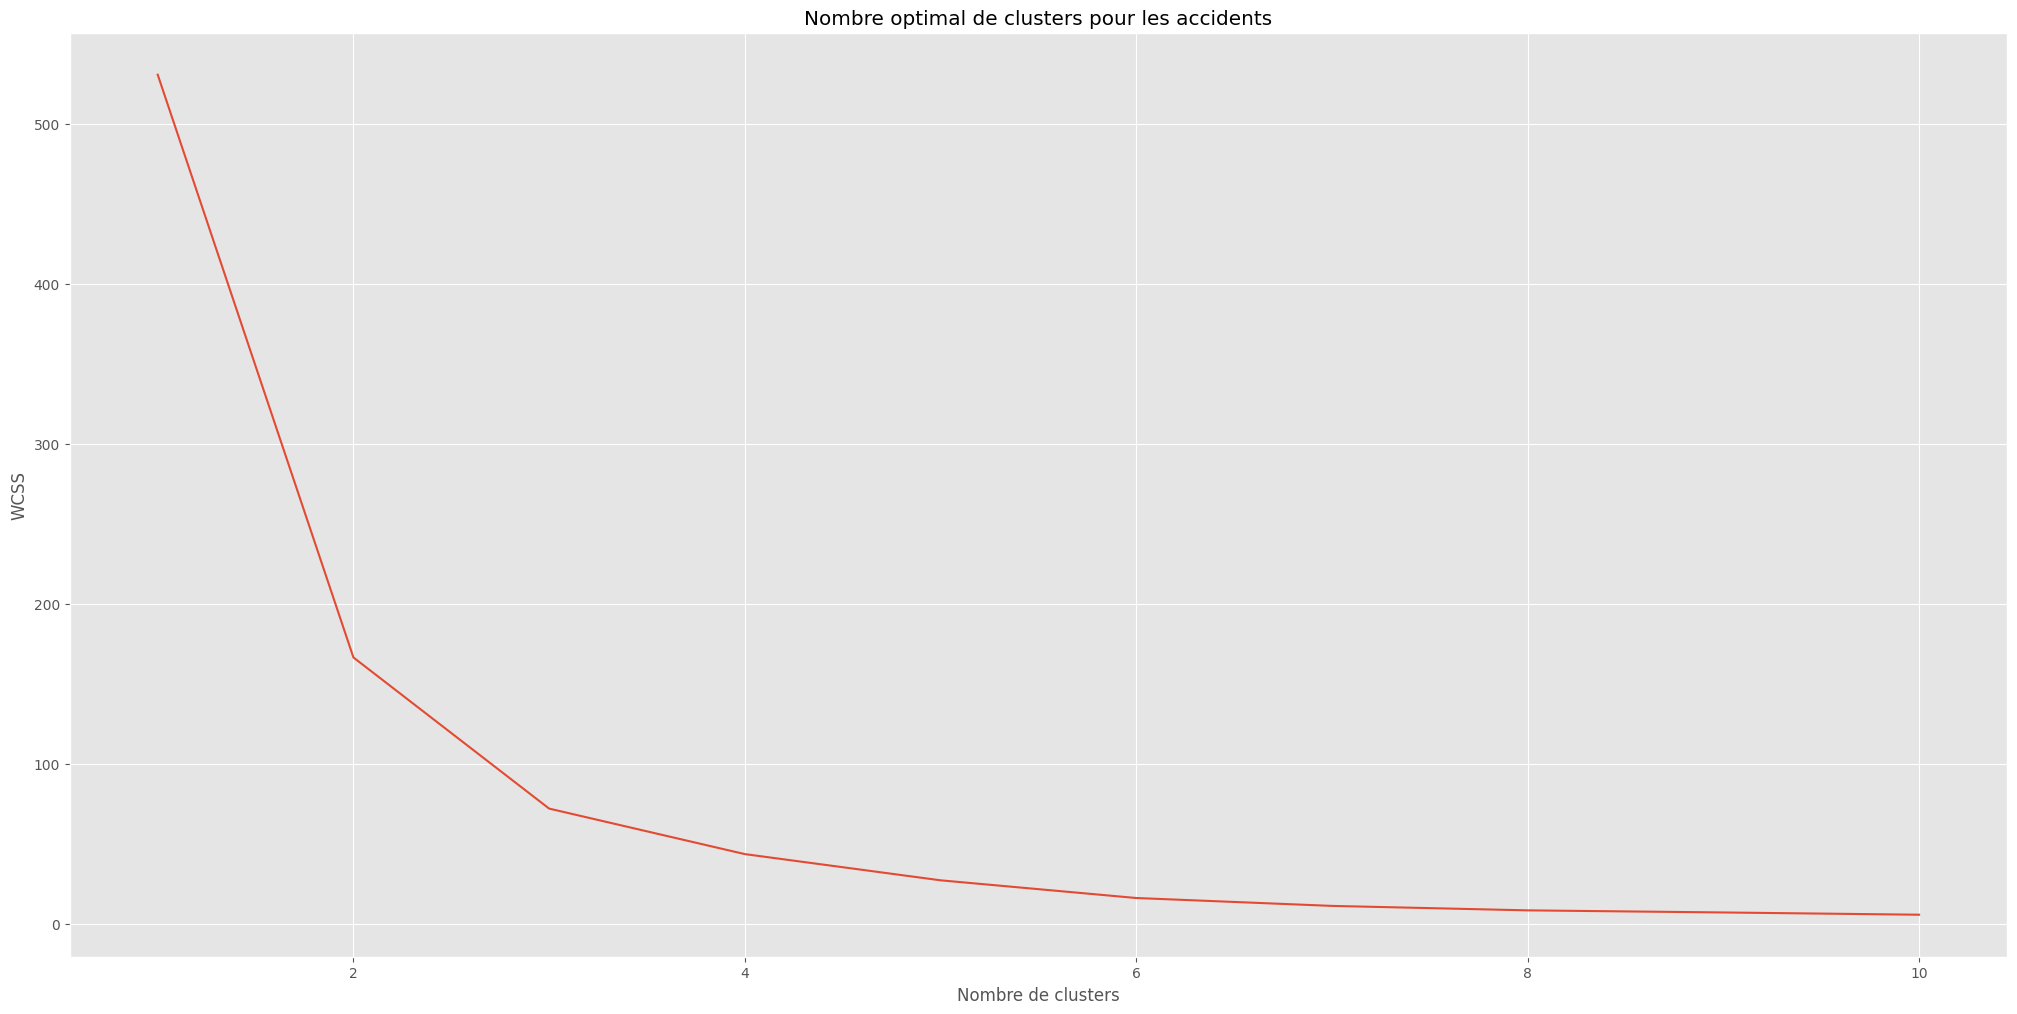

In [ ]:
# Pour chaque variable
plot_elbow(df_acc[["CANT_sc"]], "Nombre optimal de clusters pour les accidents")


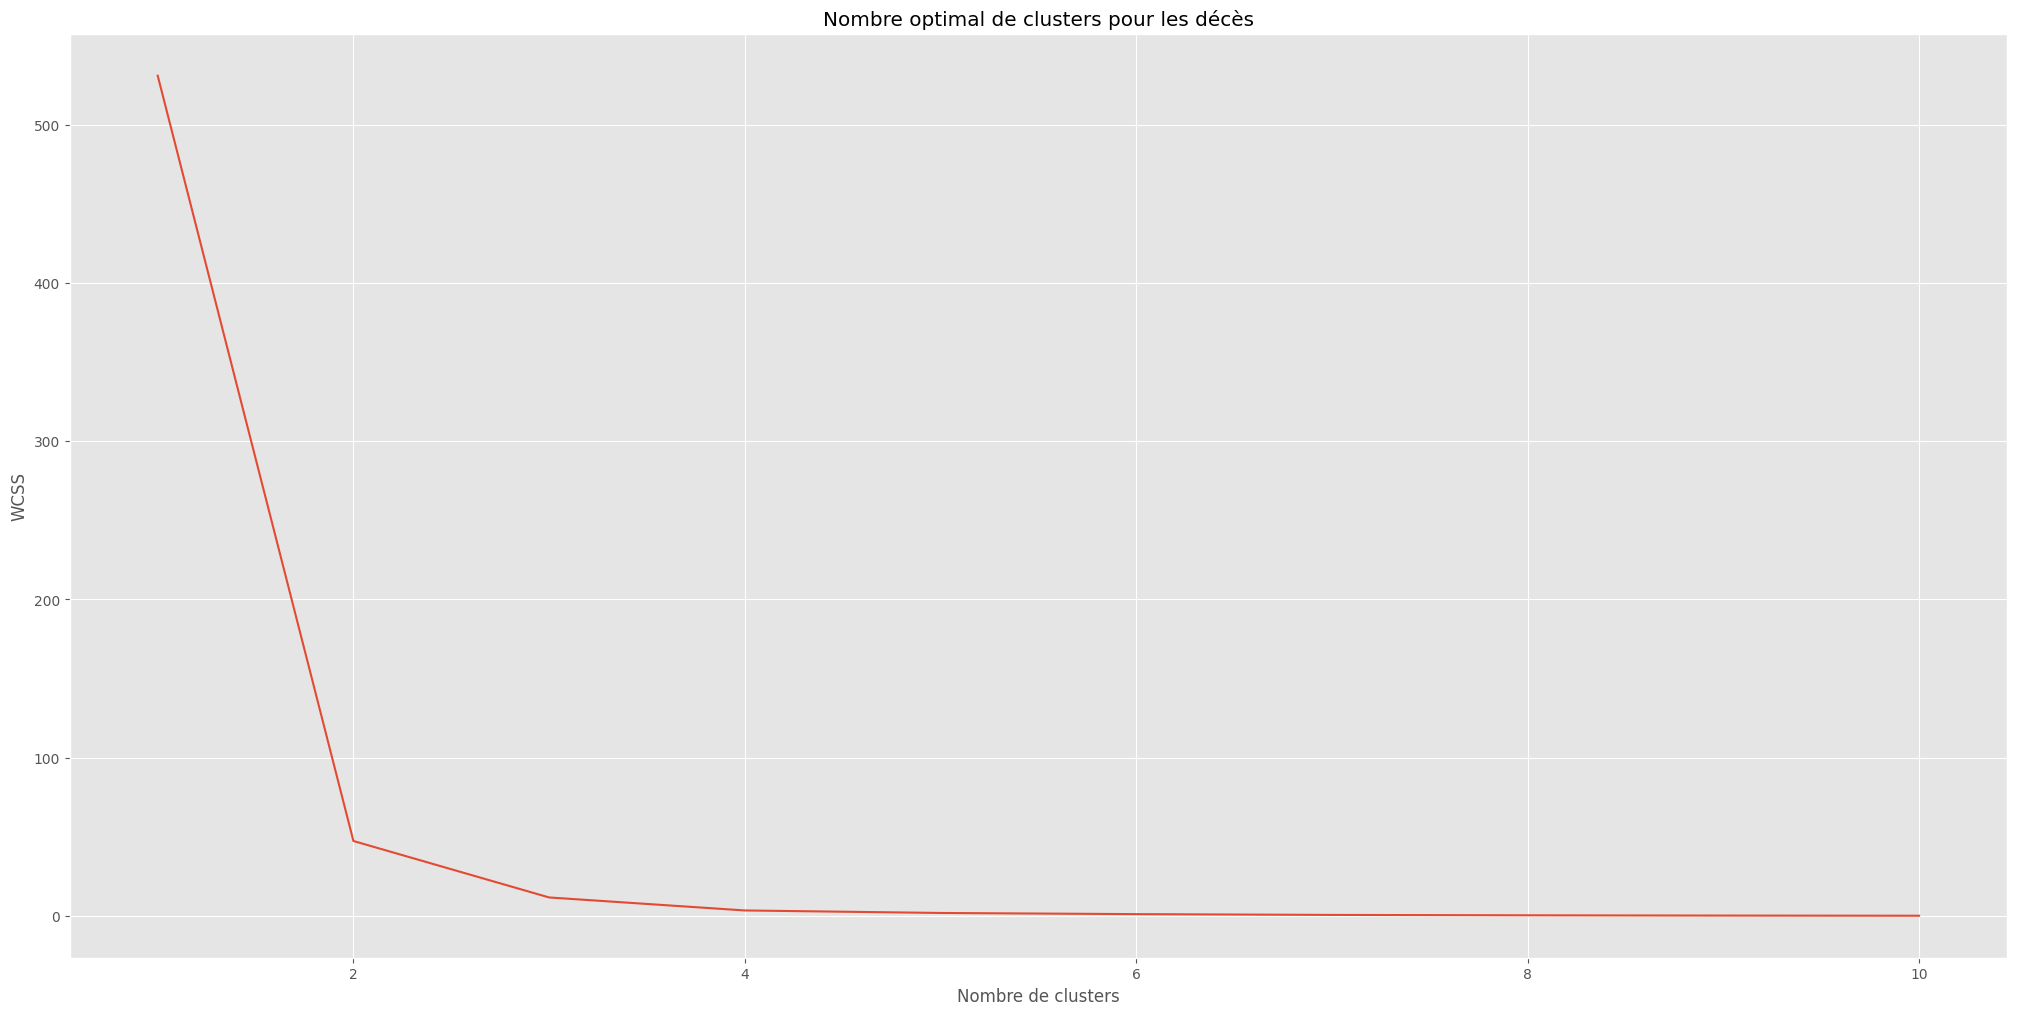

In [ ]:
plot_elbow(df_mue[["MUERTOS_sc"]], "Nombre optimal de clusters pour les décès")


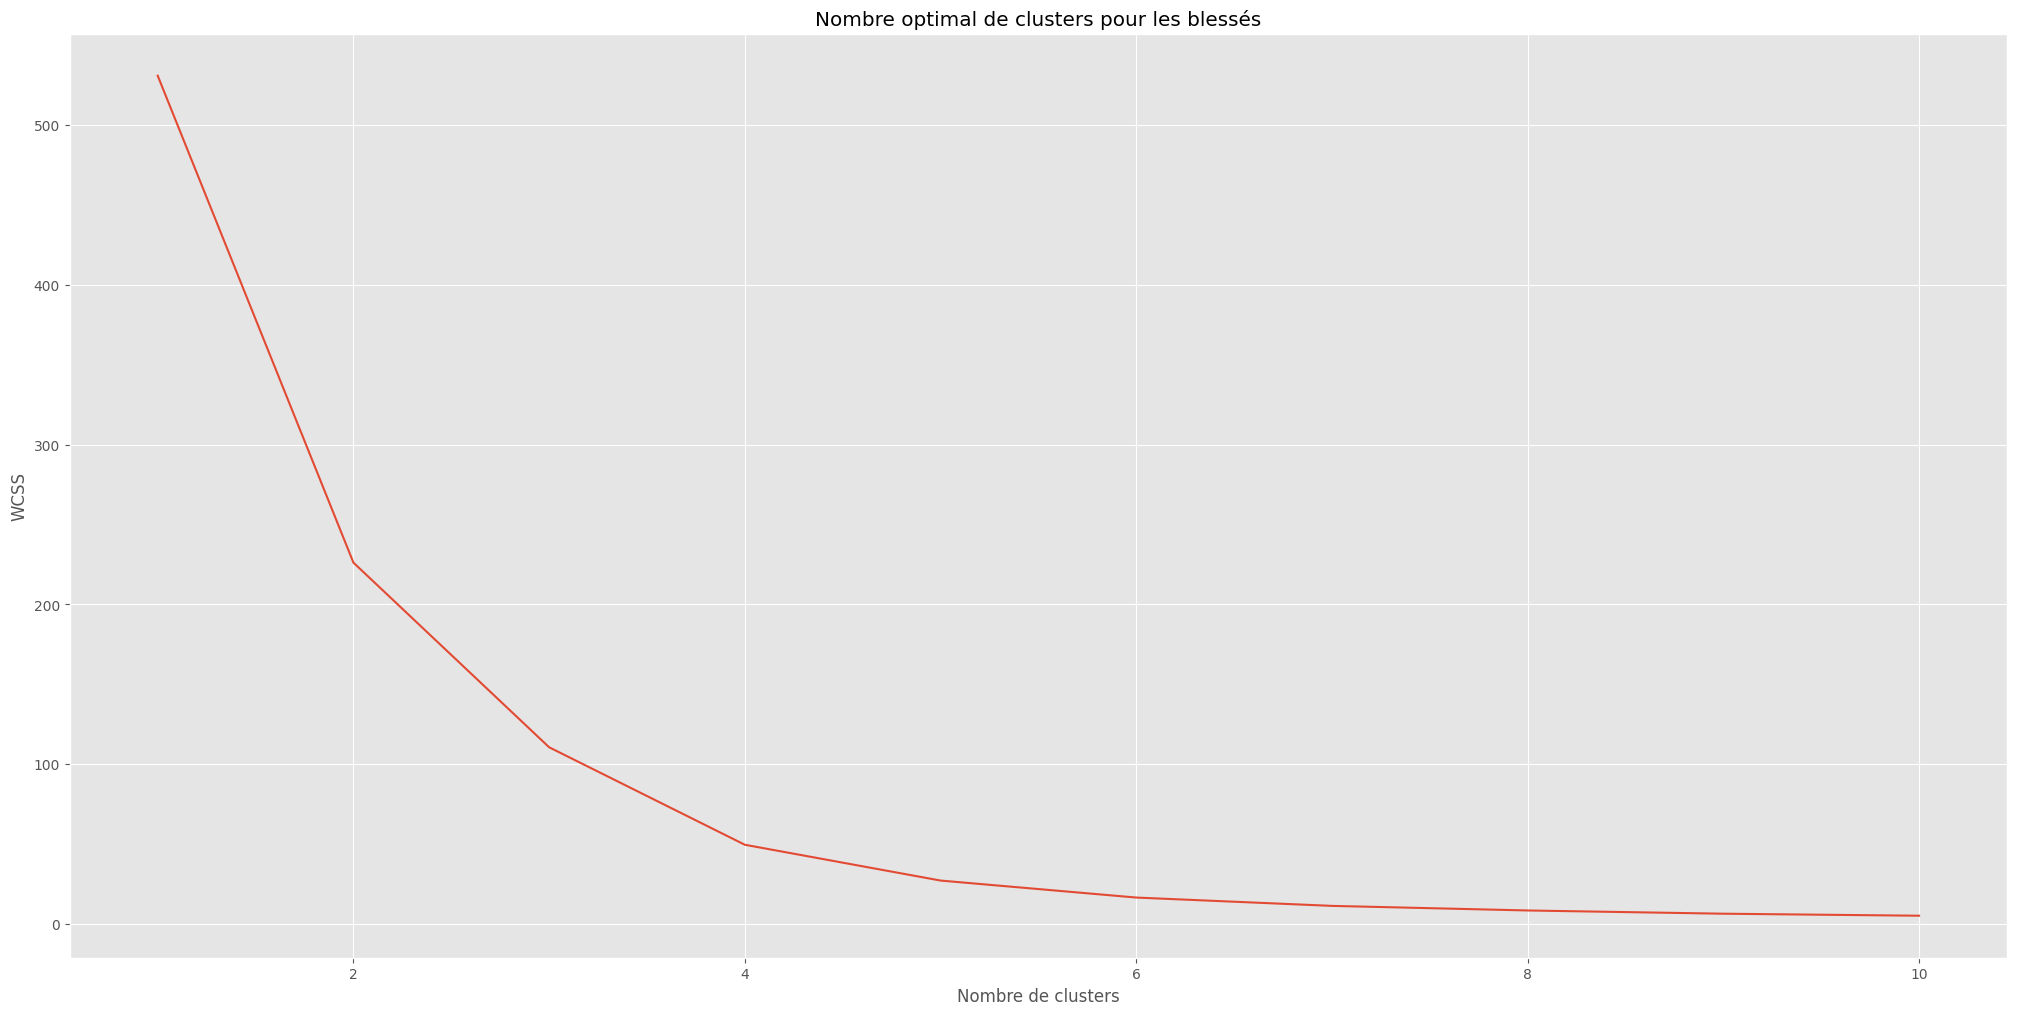

In [ ]:
plot_elbow(df_her[["HERIDOS_sc"]], "Nombre optimal de clusters pour les blessés")

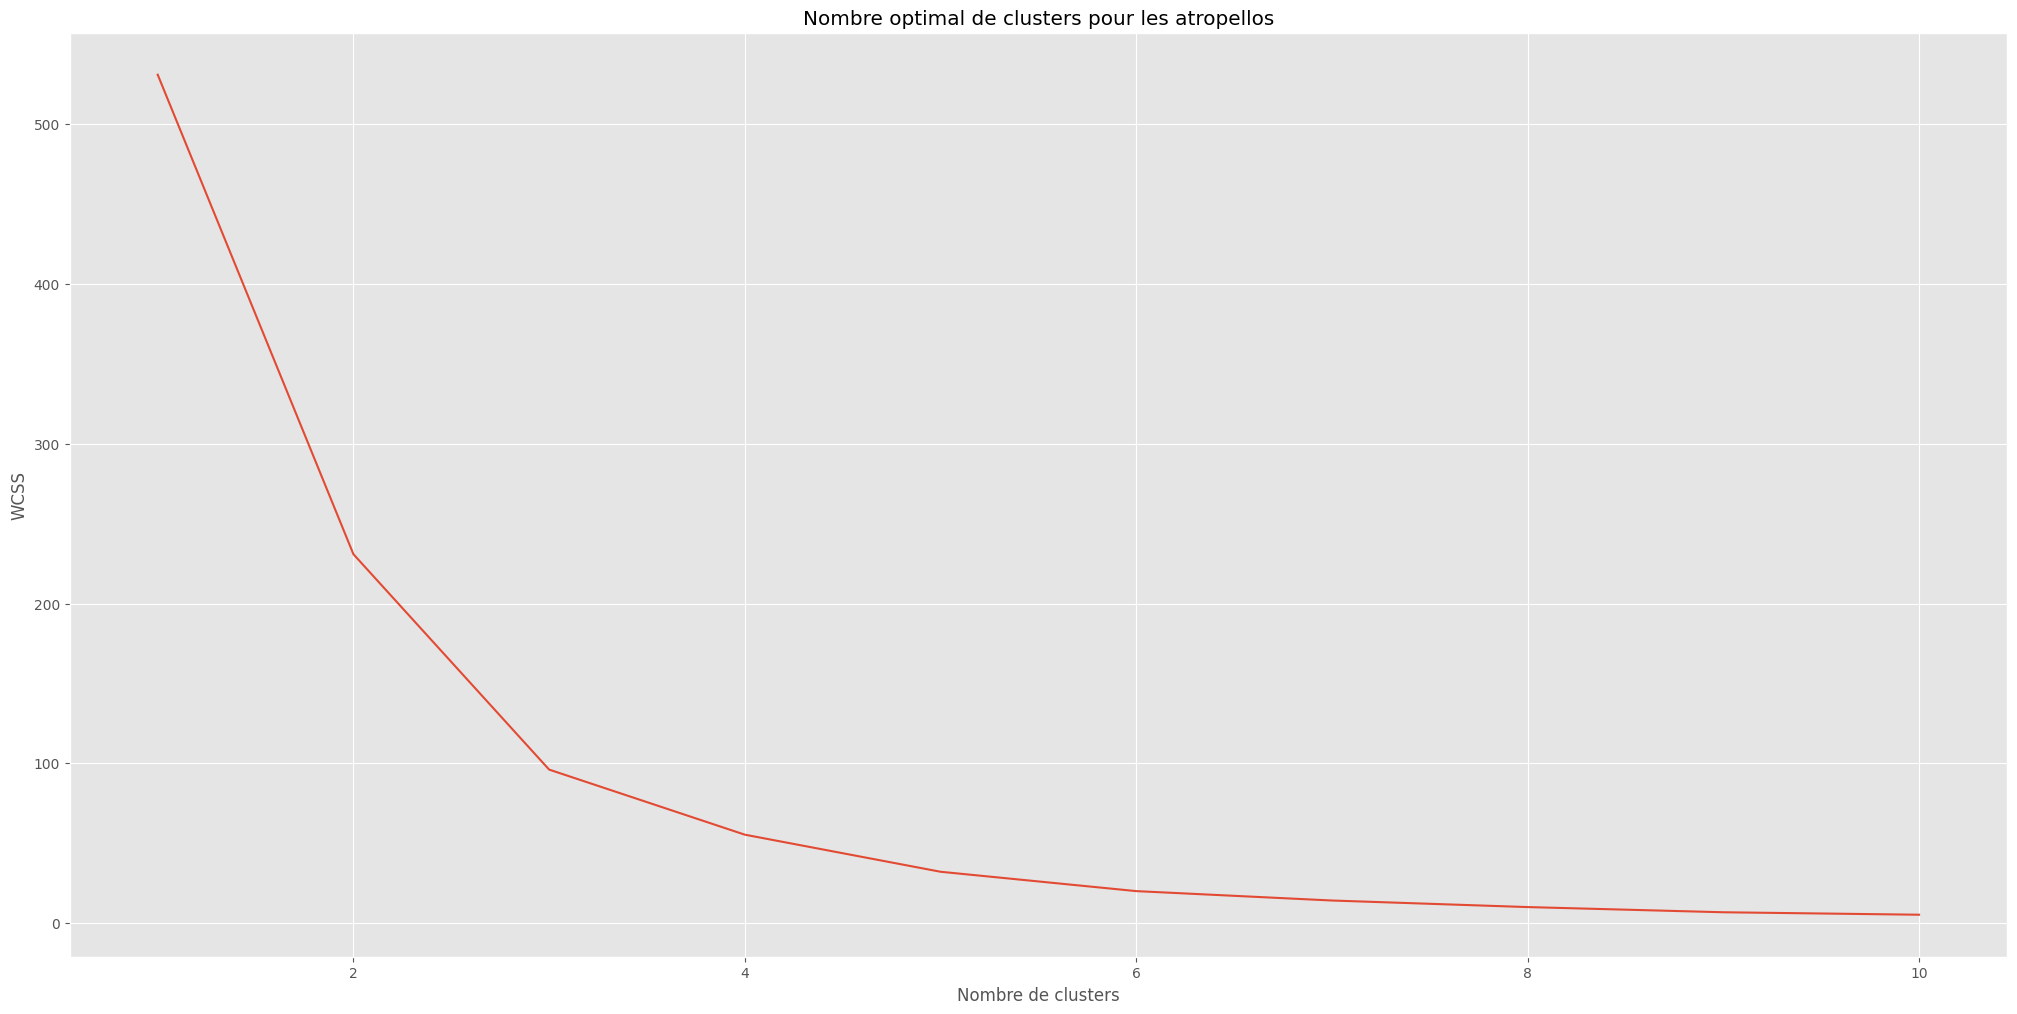

In [ ]:
plot_elbow(df_atr[["ATR_sc"]], "Nombre optimal de clusters pour les atropellos")

In [ ]:
#Número óptimo de clústeres con K-means

def find_optimal_clusters(data, title):
    distortions = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data.values.reshape(-1, 1))  # Reshape the data into a 2D array
        distortions.append(kmeans.inertia_)
    plt.plot(range(1, 11), distortions, marker='o')
    plt.title(title)
    plt.xlabel('Numero de clusteres')
    plt.ylabel('Distorsión (WCSS)')
    plt.show()

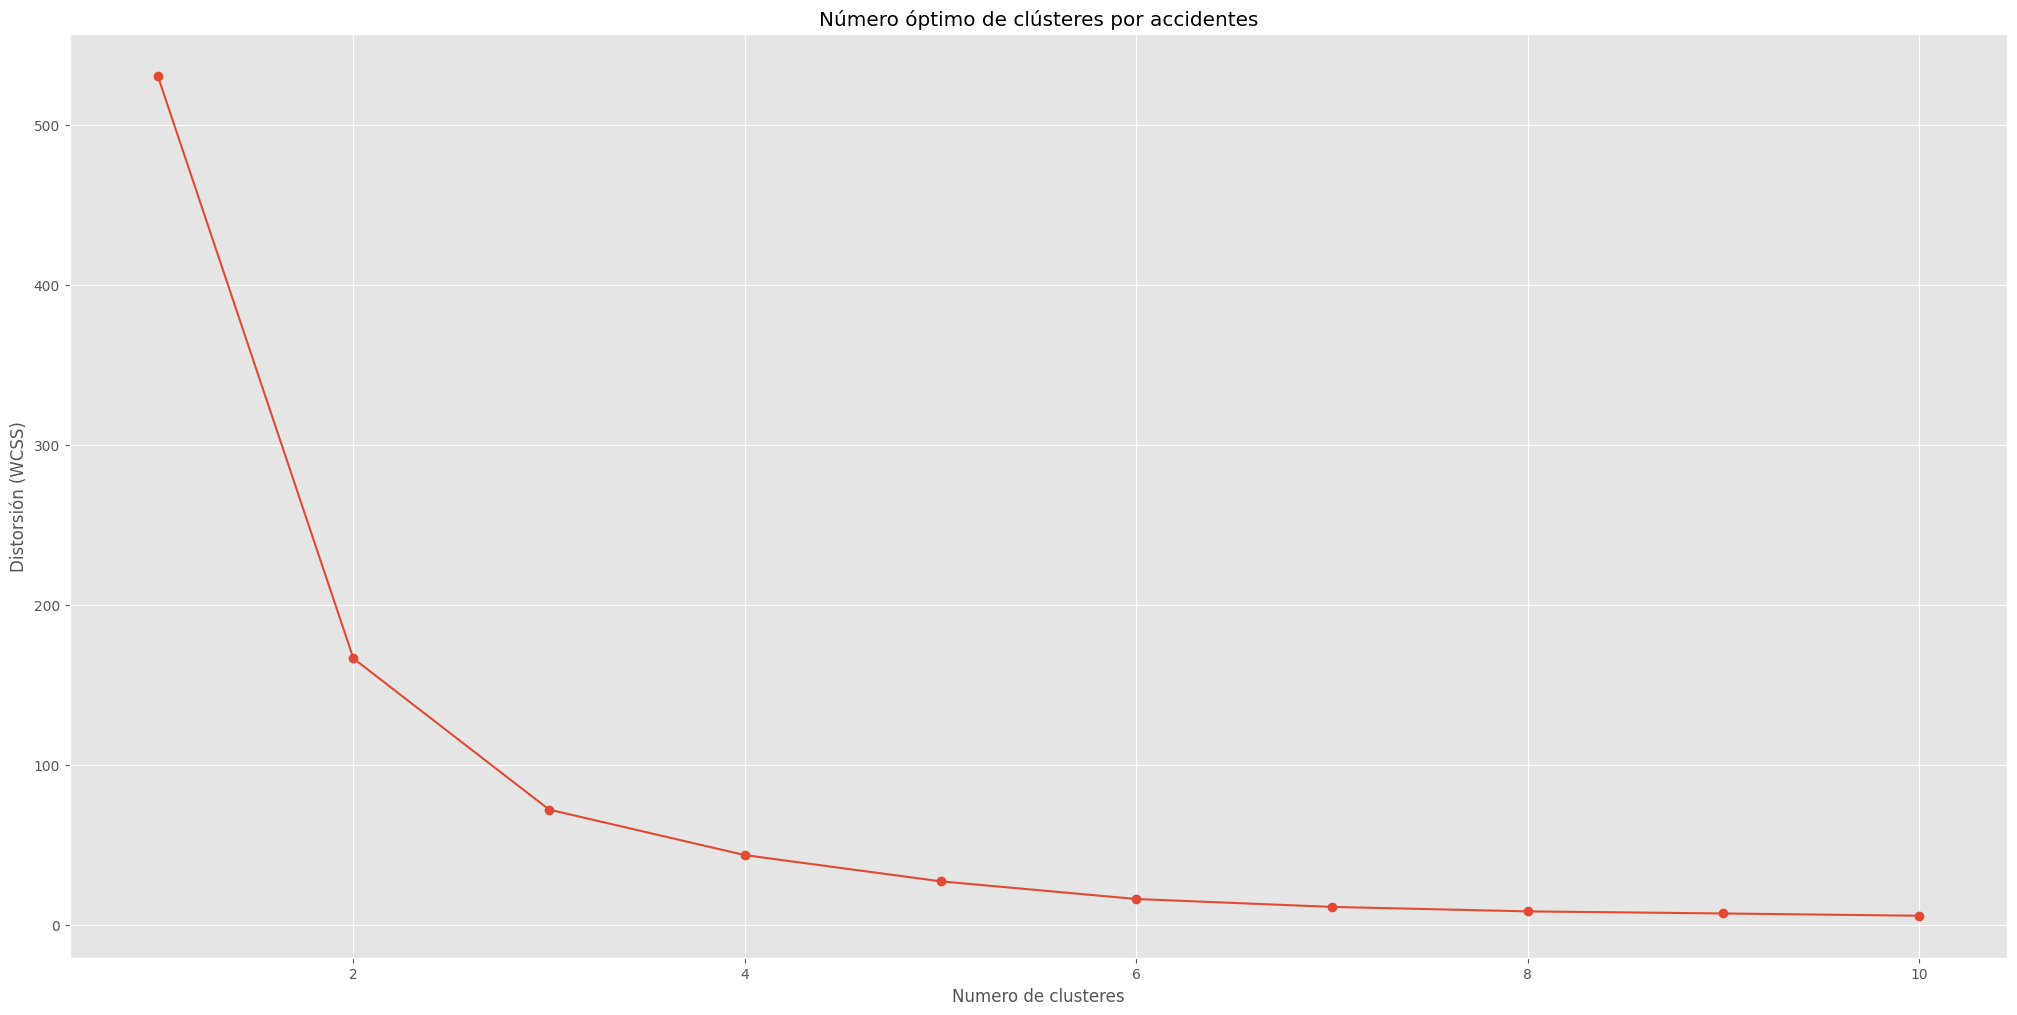

In [ ]:
find_optimal_clusters(df_acc["CANT_sc"], "Número óptimo de clústeres por accidentes")

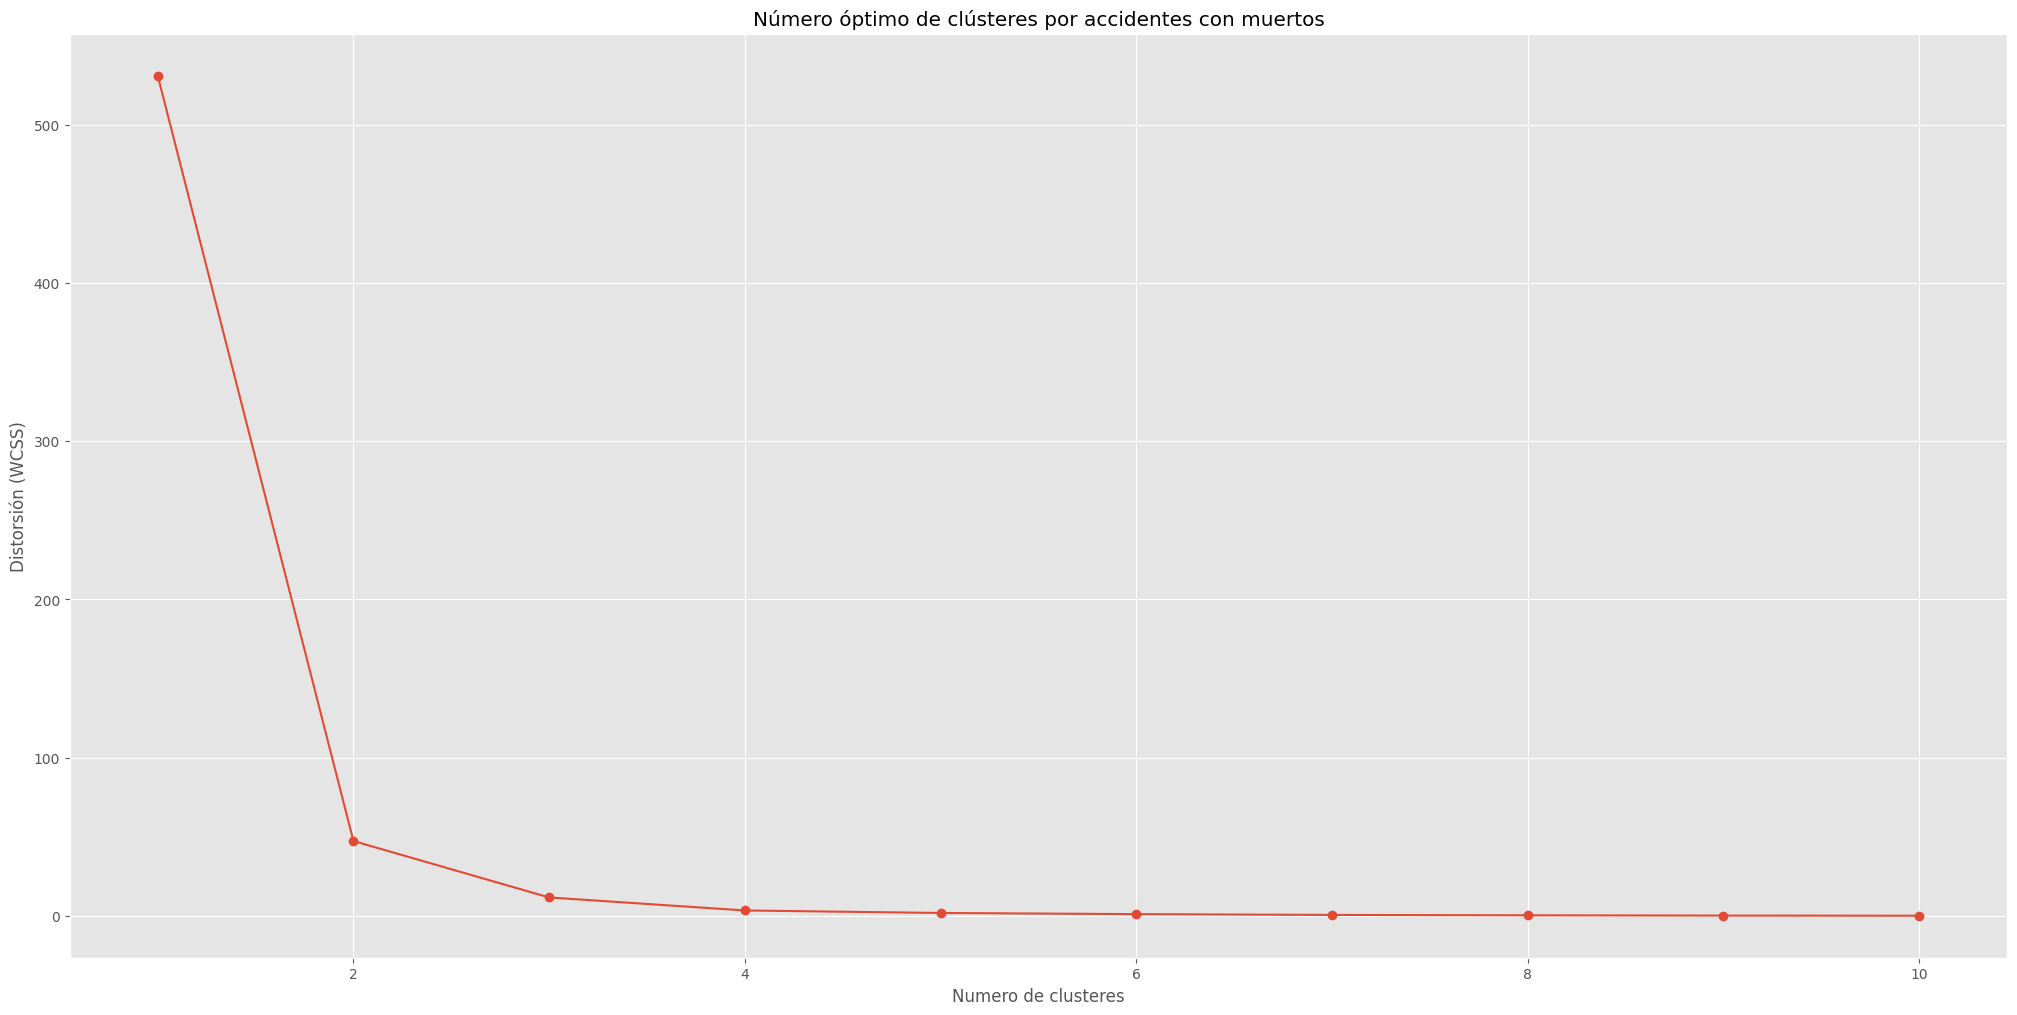

In [ ]:
find_optimal_clusters(df_mue["MUERTOS_sc"], "Número óptimo de clústeres por accidentes con muertos")

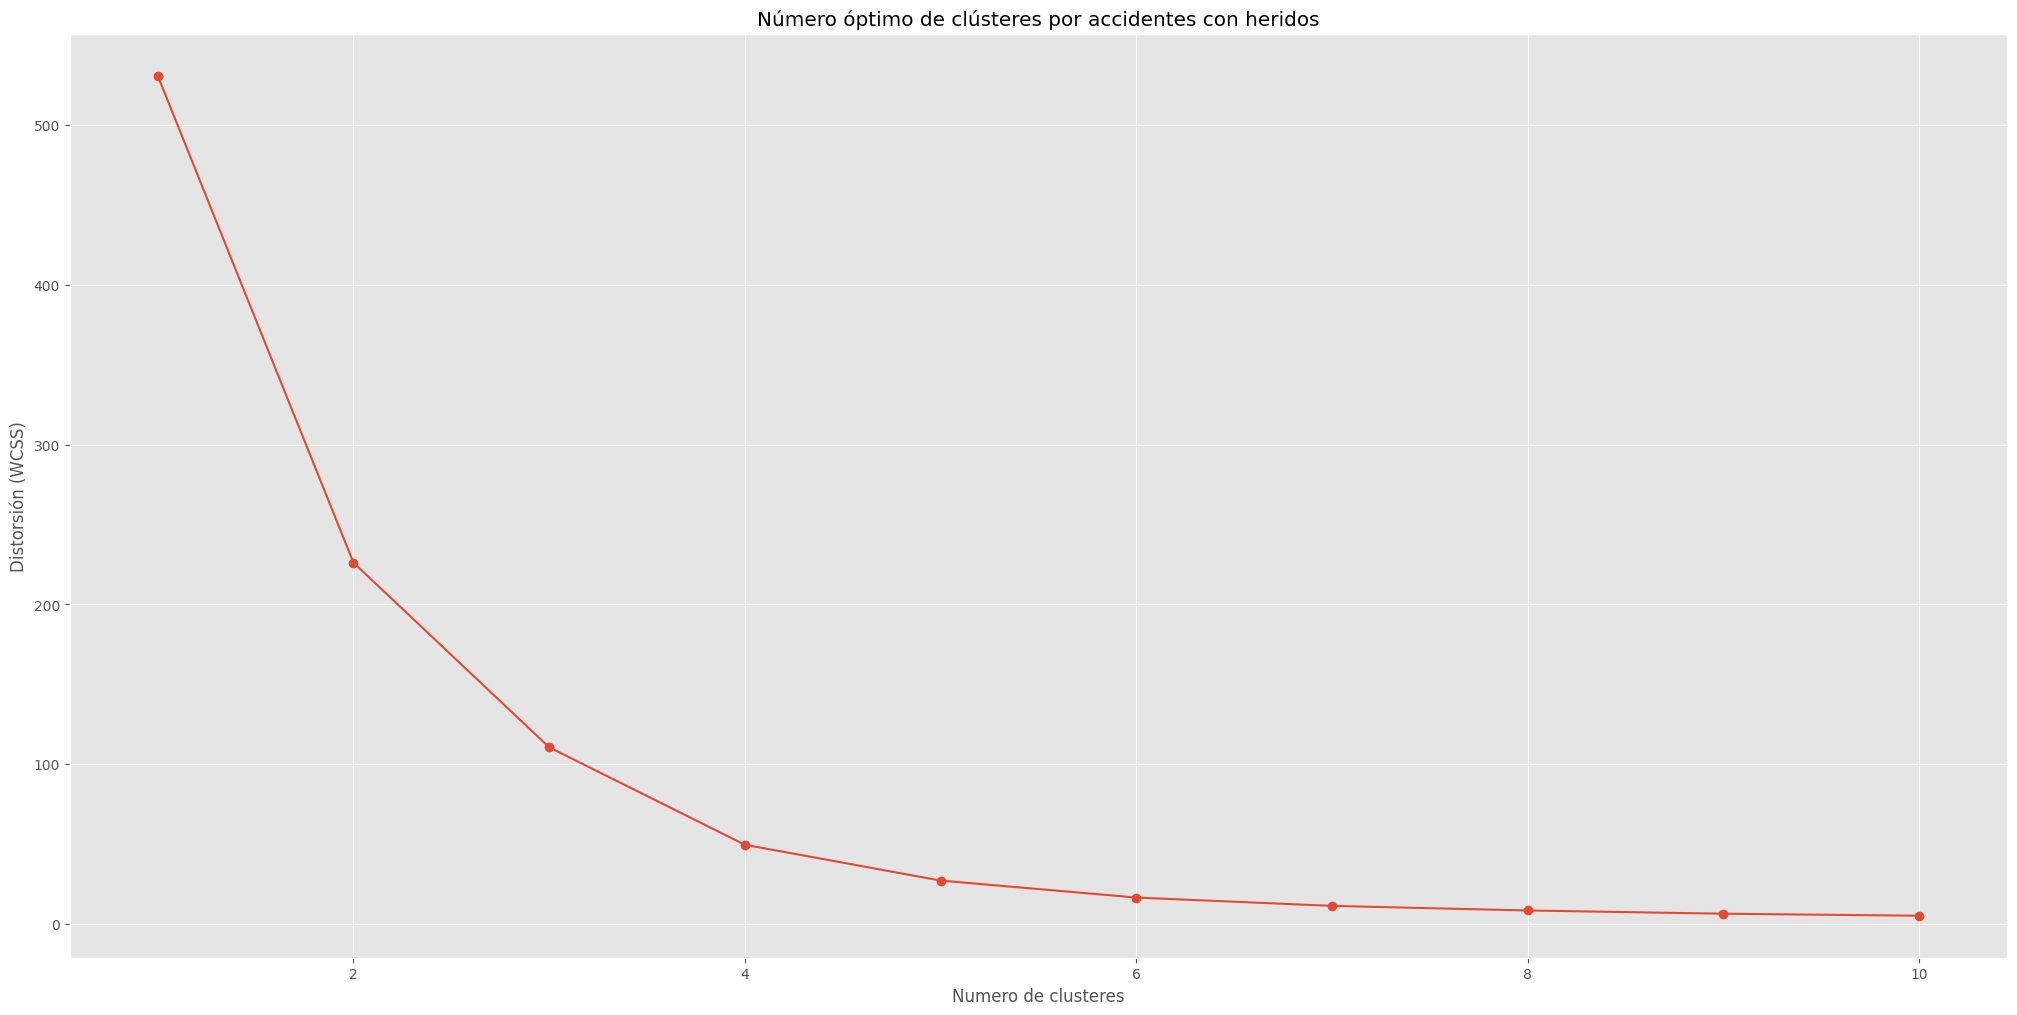

In [ ]:
find_optimal_clusters(df_her["HERIDOS_sc"], "Número óptimo de clústeres por accidentes con heridos")

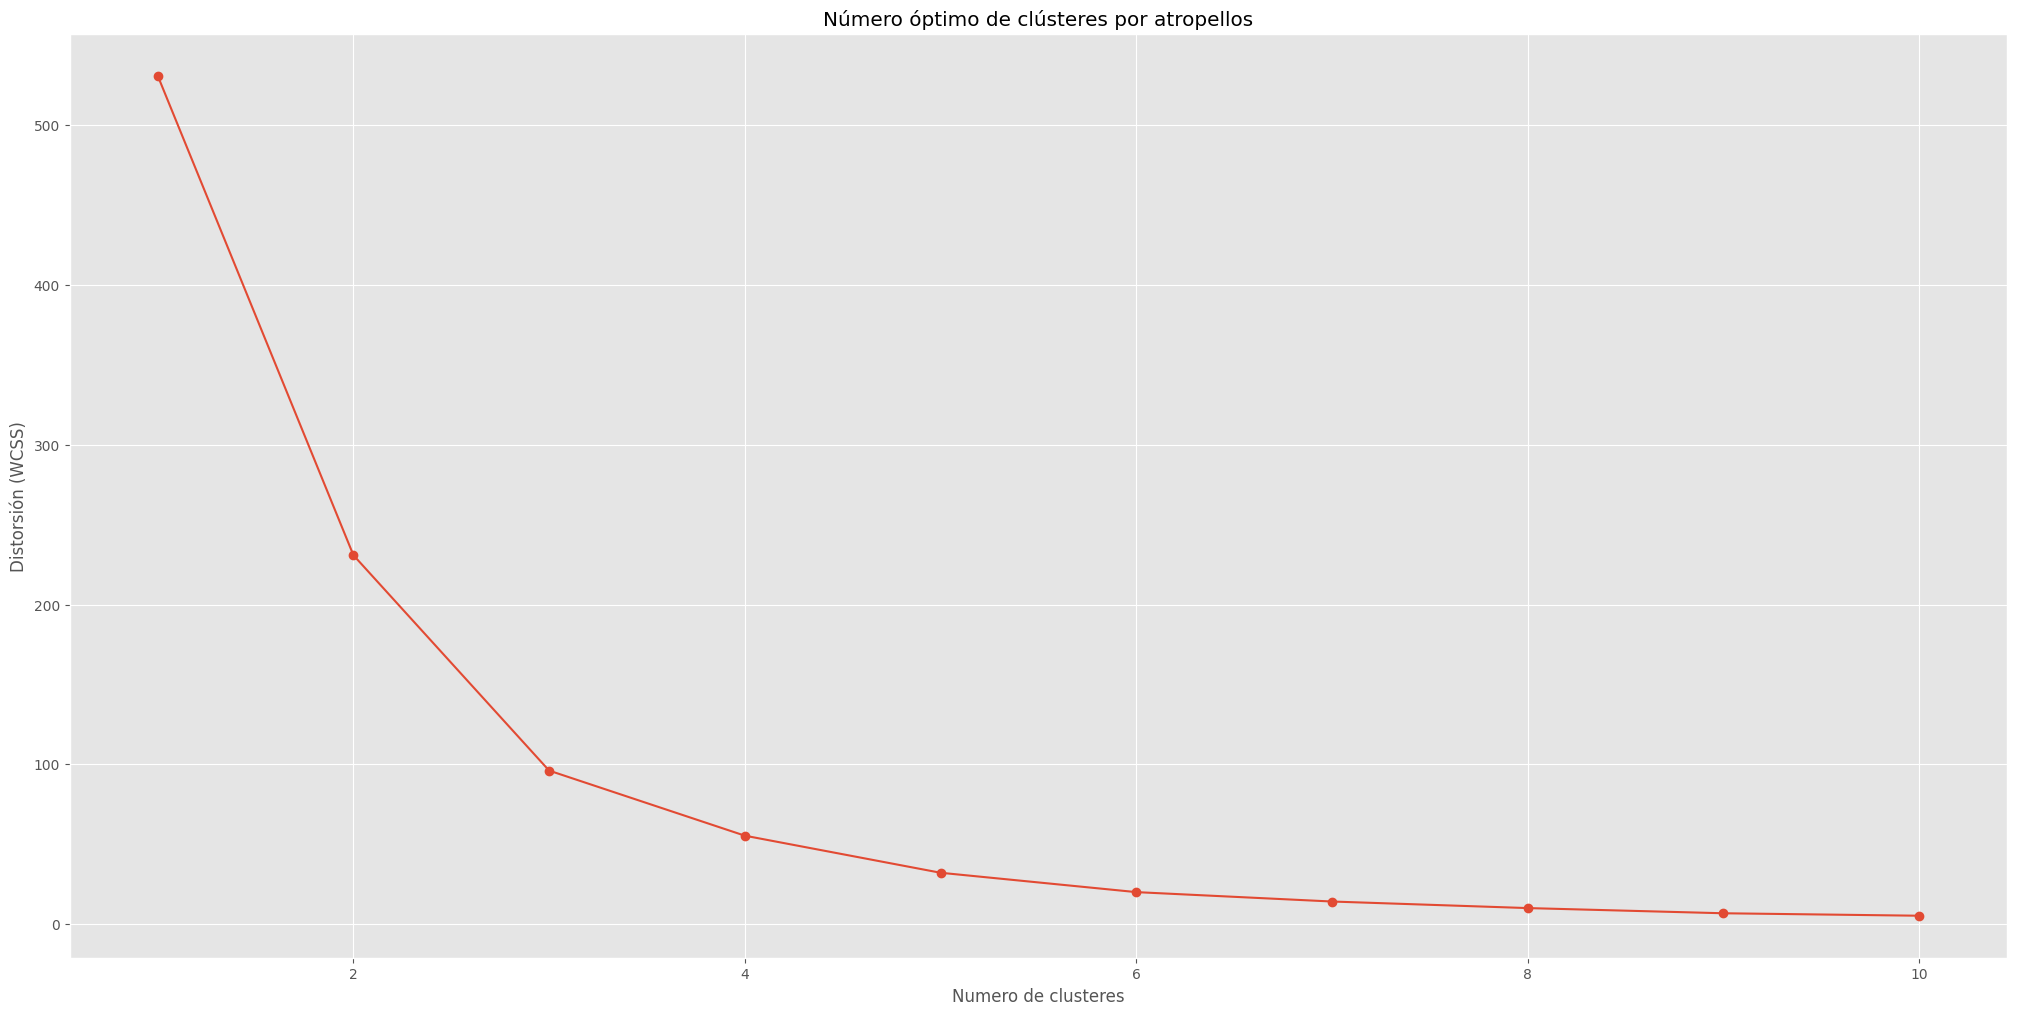

In [ ]:
find_optimal_clusters(df_atr["ATR_sc"], "Número óptimo de clústeres por atropellos")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
import folium
from folium import plugins

In [ ]:
df_acc_h = df_acc[['CANT_sc']]
df_atr_h = df_atr[['ATR_sc']]
df_her_h = df_her[['HERIDOS_sc']]
df_mue_h = df_mue[['MUERTOS_sc']]

In [ ]:
# Coeficiente de Silueta
def find_optimal_clusters(data, title):
    silhouette_scores = []
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    optimal_clusters = np.argmax(silhouette_scores) + 2
    print(title)
    print(f"Número óptimo de clusters: {optimal_clusters}\n")

In [ ]:
find_optimal_clusters(df_acc_h, "Número óptimo de agrupaciones para accidentes")

Número óptimo de agrupaciones para accidentes
Número óptimo de clusters: 2



In [ ]:
find_optimal_clusters(df_mue_h, "Número óptimo de agrupaciones para muertos")

In [ ]:
find_optimal_clusters(df_her_h, "Número óptimo de agrupaciones para heridos")

Número óptimo de agrupaciones para heridos
Número óptimo de clusters: 4



In [ ]:
find_optimal_clusters(df_atr_h, "Número óptimo de agrupaciones para atropellos")

In [ ]:
def kmeans_clustering(data, title, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    
    # Exclure la colonne 'BARRIO' pour le clustering
    data_for_clustering = data.drop("BARRIO", axis=1)
    
    kmeans.fit(data_for_clustering)
    data["Cluster"] = kmeans.labels_
    
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=data, x="BARRIO", y=data.columns[1], hue="Cluster", palette="viridis")
    plt.title(title)
    plt.xticks(rotation=90)  
    plt.show()


/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed 

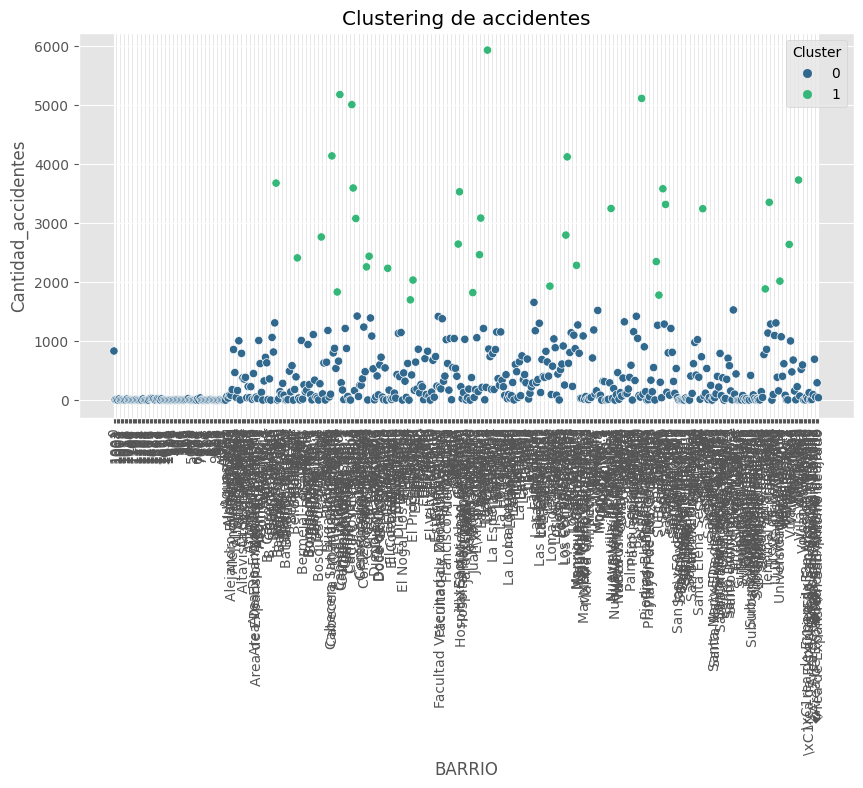

In [ ]:
# Pour chaque variable
kmeans_clustering(df_acc, "Clustering de accidentes", 2)

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed 

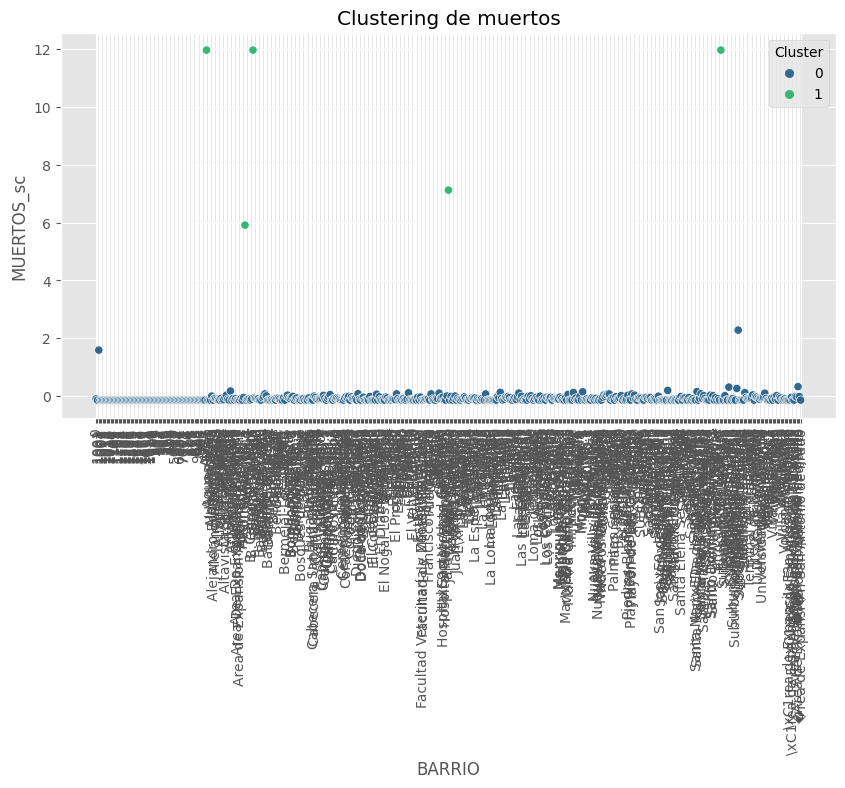

In [ ]:
kmeans_clustering(df_mue[["BARRIO", "MUERTOS_sc"]], "Clustering de muertos", 2)


/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



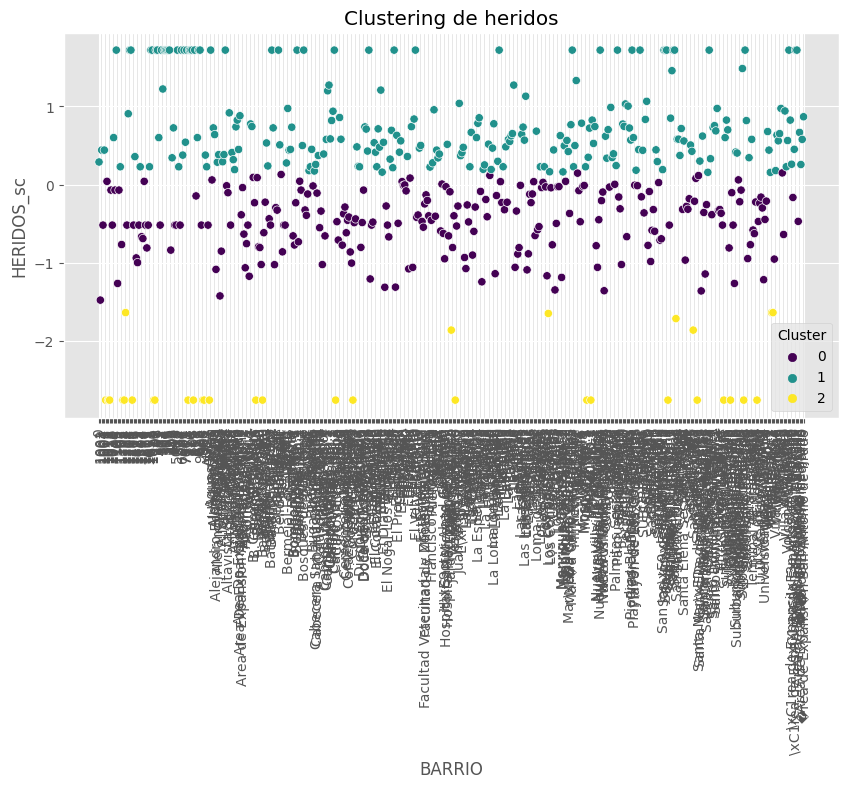

In [ ]:
kmeans_clustering(df_her[["BARRIO", "HERIDOS_sc"]], "Clustering de heridos", 3)

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/jovyan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed 

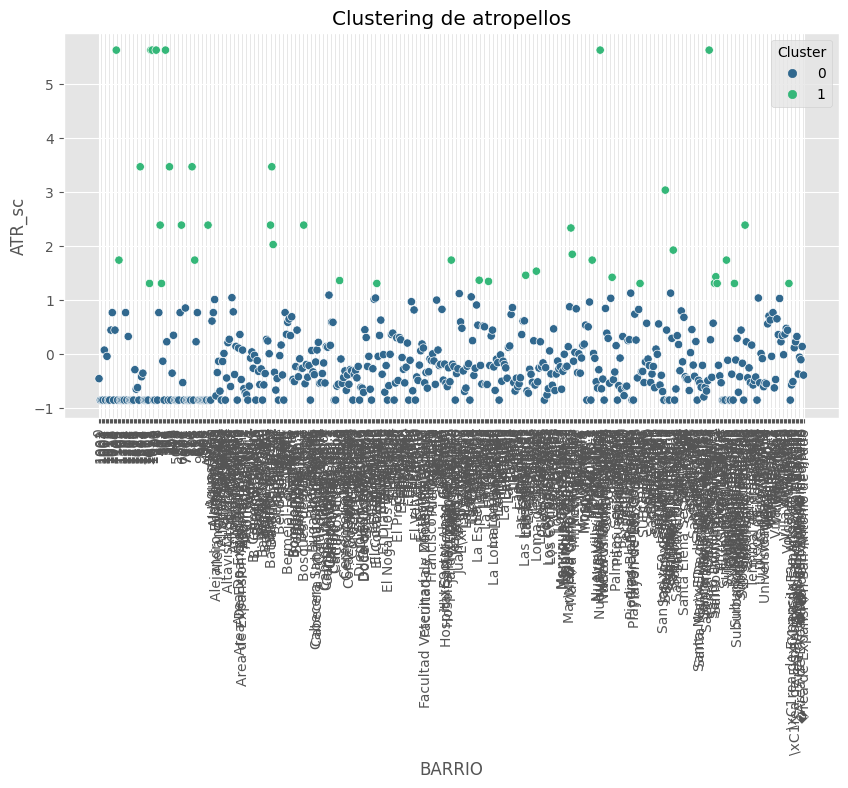

In [ ]:
kmeans_clustering(df_atr[["BARRIO", "ATR_sc"]], "Clustering de atropellos", 2)

In [ ]:
# 2.2. K-Means
# Accidentes
kmeans_acc = KMeans(n_clusters=2,n_init=10, random_state=0)
df_acc["GR_ACCIDENTES"] = kmeans_acc.fit_predict(df_acc[["CANT_sc"]])

# Muertos
kmeans_mue = KMeans(n_clusters=2, n_init=10,random_state=0)
df_mue["GR_MUERTOS"] = kmeans_mue.fit_predict(df_mue[["MUERTOS_sc"]])

# Heridos
kmeans_her = KMeans(n_clusters=3, n_init=10,random_state=0)
df_her["GR_HERIDOS"] = kmeans_her.fit_predict(df_her[["HERIDOS_sc"]])

# Atropellos
kmeans_atr = KMeans(n_clusters=2, n_init=10,random_state=0)
df_atr["GR_ATROPELLOS"] = kmeans_atr.fit_predict(df_atr[["ATR_sc"]])


In [ ]:
# Resultados estadísticos del K-Means
# Distancia interna (intra-cluster): siloidwidth
# Distancia externa (inter-cluster): dunn
def calculate_cluster_stats(data, cluster_labels):
    dist_matrix = pairwise_distances(data)
    silhouette = silhouette_score(data, cluster_labels)
    davies_bouldin = davies_bouldin_score(data, cluster_labels)
    return silhouette, davies_bouldin

In [ ]:
silhouette_acc, davies_bouldin_acc = calculate_cluster_stats(df_acc_h, kmeans_acc.labels_)
print('Accidentes')
print(f"Distancia intra-cluster : {silhouette_acc}")
print(f"Distancia extra-cluster : {davies_bouldin_acc}")

Accidentes
Distancia intra-cluster : 0.8178004742041918
Distancia extra-cluster : 0.42672320164875044


In [ ]:
silhouette_mue, davies_bouldin_mue = calculate_cluster_stats(df_mue_h, kmeans_mue.labels_)
print('Muertos')
print(f"Distancia intra-cluster : {silhouette_mue}")
print(f"Distancia extra-cluster : {davies_bouldin_mue}")

Muertos
Distancia intra-cluster : 0.988020597357321
Distancia extra-cluster : 0.2708951571593189


In [ ]:
silhouette_her, davies_bouldin_her = calculate_cluster_stats(df_her_h, kmeans_her.labels_)
print('Heridos')
print(f"Distancia intra-cluster : {silhouette_her}")
print(f"Distancia extra-cluster : {davies_bouldin_her}")

Heridos
Distancia intra-cluster : 0.5710851176638075
Distancia extra-cluster : 0.4971396100277869


In [ ]:
silhouette_atr, davies_bouldin_atr = calculate_cluster_stats(df_atr_h, kmeans_atr.labels_)
print('Atropellos')
print(f"Distancia intra-cluster : {silhouette_atr}")
print(f"Distancia extra-cluster : {davies_bouldin_atr}")

Atropellos
Distancia intra-cluster : 0.7355872009779154
Distancia extra-cluster : 0.5911925904419439


Descargar los Dataframe

In [ ]:
#df_acc.to_csv('df_accidentes_cluster.csv', index=False)
#df_mue.to_csv('df_muertos_cluster.csv', index=False)
#df_her.to_csv('df_heridos_cluster.csv', index=False)
#df_atr.to_csv('df_atropellos_cluster.csv', index=False)


Agrupamiento Multiclass

In [ ]:
df_multi = df_tmp.copy()

In [ ]:
df_multi = df_multi.drop(columns=['AÑO',
 'CLASE_ACCIDENTE',
 'DIRECCION',
 'DISEÑO',
 'FECHA_ACCIDENTE',
 'NUMCOMUNA',
 'LOCATION',
 'SEMANA',
 'NOMBRE DEL DÍA',
 'GRAVEDAD_ACCIDENTE',
 'MES',
 'DÍA'])

In [ ]:
df_multi.columns.to_list()

['BARRIO', 'MUERTOS', 'HERIDOS', 'ATROPELLOS']

In [ ]:
df_mlt = df_multi.groupby('BARRIO').sum().reset_index()
df_mlt['TOTAL'] = df_mlt['MUERTOS'] + df_mlt['HERIDOS'] + df_mlt['ATROPELLOS']


In [ ]:
df_mlt = df_mlt.sort_values(by='TOTAL', ascending=False)
df_mlt

,BARRIO,MUERTOS,HERIDOS,ATROPELLOS,TOTAL
281,La Candelaria,26,2455,1006,3487
164,Cabecera San Antonio de Prado,47,2445,592,3084
179,Caribe,26,2550,200,2776
170,Campo Amor,29,2427,253,2709
182,Castilla,13,2292,361,2666
...,...,...,...,...,...
485,Suburbano Piedra Gorda,0,0,0,0
428,San Jose Del Manzanillo,0,0,0,0
475,Suburbano El Cerro,0,0,0,0
450,Santa Luc�a,0,0,0,0


In [ ]:
df_mlt.to_csv('df_multiclass.csv', index=False)

Now, you can do the map with Agruopacion Multiclass

# Vizualisation

In [ ]:
df_viz = df_tmp.copy()

In [ ]:
df_viz = df_viz[(df_viz['AÑO'] == '2015') | (df_viz['AÑO'] == '2016') | (df_viz['AÑO'] == '2017') | (df_viz['AÑO'] == '2018') | (df_viz['AÑO'] == '2019')]

In [ ]:
df_viz['FECHA_ACCIDENTE'] = df_viz['FECHA_ACCIDENTE'].dt.date

In [ ]:
viz_columns_to_encode = ['CLASE_ACCIDENTE']
df_viz_encode = pd.get_dummies(df_viz, columns=viz_columns_to_encode, dtype=int)

In [ ]:
df_viz_encode = df_viz_encode.drop(columns=['AÑO',
 'DIRECCION',
 'DISEÑO',
 'GRAVEDAD_ACCIDENTE',
 'MES',
 'BARRIO',
 'NUMCOMUNA',
 'LOCATION',
 'DÍA',
 'SEMANA',
 'NOMBRE DEL DÍA',])

In [ ]:
df_analysis = df_viz_encode.groupby('FECHA_ACCIDENTE').sum().reset_index()
df_analysis.columns = df_analysis.columns.str.replace('CLASE_ACCIDENTE_', '')
df_analysis

,FECHA_ACCIDENTE,MUERTOS,HERIDOS,ATROPELLOS,Atropello,Caida Ocupante,Choque,Incendio,Otro,Volcamiento
0,2015-01-01,0,64,27,27,10,22,0,8,3
1,2015-01-02,0,46,10,10,9,45,0,10,3
2,2015-01-03,0,49,11,11,11,42,0,8,1
3,2015-01-04,0,40,8,8,11,33,0,5,1
4,2015-01-05,2,44,8,8,3,52,0,6,7
...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,1,61,11,11,9,62,0,5,8
1822,2019-12-28,2,52,11,11,6,60,0,5,11
1823,2019-12-29,1,54,6,6,10,47,0,11,6
1824,2019-12-30,1,88,7,7,22,57,0,21,9


In [ ]:
df_analysis.to_csv('df_analysis.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7a66f1f6-a22d-45c4-8e8c-1b7948ed24c7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>